In [13]:
import requests
import json
import pandas as pd
#from tqdm import tqdm  
from datetime import date,timedelta, datetime
import numpy as np
from sqlalchemy.orm import Session
from sqlalchemy.engine import reflection
from sqlalchemy import inspect
from sqlalchemy import create_engine, Column, Integer, String, TIMESTAMP, FLOAT, MetaData, Table, text, DateTime, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
from sqlalchemy.exc import IntegrityError, SQLAlchemyError, InterfaceError
from sqlalchemy.ext.declarative import declarative_base
from data_loading import load_data_from_db, preprocess_sensor_data
from os import path

from pathlib import Path


In [2]:
from pyLeanxcale.errors import InterfaceError as lxsInterfaceError

## Read tags

In [21]:
uploaded_file2 = "/home/george/Jupyter Notebooks/FAME/data/Machines_TAG_v2.csv"
tags = pd.read_csv(uploaded_file2, header=0)

In [22]:
tags.columns = tags.columns.str.lower()

In [23]:
tags

,tag,tag description,machine_group,low_threshold,high_threshold,threshold_type,aggregation_rule,engineering_units,category
0,22PI102,SEAL OIL MAIN PUMP PRESSURE,K-2201_KT-2201,6,NaN,Down,min,Kgf/cm2,Pressure
1,22PI103,CONTROL OIL HEADER PRESSURE,K-2201_KT-2201,5,NaN,Down,min,Kgf/cm2,Pressure
2,22PI69,L.O MAIN PUMP DELIVERY LOW PRESSURE,K-2201_KT-2201,7.1,NaN,Down,min,Kgf/cm2,Pressure
3,22PI70,LUBE OIL HEADER PRESSURE,K-2201_KT-2201,6.6,NaN,Down,min,Kgf/cm2,Pressure
4,22PI95,L.O. HEADER PRESSURE,K-2201_KT-2201,0.96,NaN,Down,min,Kgf/cm2,Pressure
...,...,...,...,...,...,...,...,...,...
77,75XI824BX,COMPRESSOR BCL 509/A JOURNAL BEARING RAD. VIB...,K-7502_ST-7501,NaN,89.0,Up,max,micron,Vibration
78,75ZI800BA,STEAM TURBINE NG 40/32 SHAFT AXIAL DISPLACEMENT,K-7502_ST-7501,-0.5,0.5,Up/Down,avg,mm,Axial Displacement
79,75ZI800BB,STEAM TURBINE NG 40/32 SHAFT AXIAL DISPLACEMENT,K-7502_ST-7501,-0.5,0.5,Up/Down,avg,mm,Axial Displacement
80,75ZI801BA,COMPRESSOR BCL 509/A SHAFT AXIAL DISPLACEMENT,K-7502_ST-7501,-0.5,0.5,Up/Down,avg,mm,Axial Displacement


## LXS 

In [6]:
def get_db_connection(db_user, db_pass, db_ip, db_port, db_name):
    connection_url = f'leanxcale://{db_user}:{db_pass}@{db_ip}:{db_port}/{db_name}?autocommit=False&parallel=True?txn_mode=NO_CONFLICTS_NO_LOGGING'
    return create_engine(connection_url)

def get_table_names(db_connection):
    return inspect(db_connection).get_table_names()

# Example usage
DB_USER = 'app'
DB_PASS = 'app'
DB_IP   = '0.0.0.0'
DB_PORT = '1529'
DB_NAME = 'MOH'

engine = get_db_connection(DB_USER, DB_PASS, DB_IP, DB_PORT, DB_NAME)

table_names = get_table_names(engine)
print(f"Connection established successfully!\nTables:{table_names}")

Connection established successfully!
Tables:['K3301', 'K3301_HOURS', 'K5700', 'KT2201', 'KT2201_HOURS', 'SENSOR_DESCRIPTION']


In [7]:
table_names

['K3301',
 'K3301_HOURS',
 'K5700',
 'KT2201',
 'KT2201_HOURS',
 'SENSOR_DESCRIPTION']

In [14]:
readings = load_data_from_db(table_names[1], engine)
readings, sensors = preprocess_sensor_data(readings)

Error at HTTP connection level... Trying to reconnect
Successfully reconnected HTTP connection, Continuing...
pk_list: []


In [15]:
readings

,33vi604,33vi602,33vi601,33vi603,33pi222,33si501a,33pi601
timestamp,,,,,,,
2021-05-15 00:00:00,8.602797,34.421453,15.050502,2.376467,1.801084,7716.502716,16.980050
2021-05-15 01:00:00,8.704029,34.367151,14.945922,2.380397,1.798557,7689.147996,16.880140
2021-05-15 02:00:00,9.332150,35.104185,15.864851,2.454872,1.700317,7710.190889,16.974239
2021-05-15 03:00:00,8.314283,35.456944,15.961604,2.431120,1.667827,7691.792533,17.034439
2021-05-15 04:00:00,8.206361,35.523200,15.764460,2.403550,1.673674,7692.047808,16.951268
...,...,...,...,...,...,...,...
2023-10-22 20:00:00,7.097853,15.449336,6.719498,2.570054,2.199475,9435.918972,9.760433
2023-10-22 21:00:00,6.951333,15.358324,6.726122,2.620395,2.215197,9376.528025,9.766630
2023-10-22 22:00:00,6.882975,15.242274,6.671144,2.669544,2.219016,9351.339155,9.771157


In [36]:
filtered_tags

,tag,tag description,machine_group,low_threshold,high_threshold,threshold_type,aggregation_rule,engineering_units,category
35,33pi222,LUBE OIL INLET PRESSURE,K-3301 B_KT-3301 B,1.5,NaN,Down,min,kg/cm2,Pressure
36,33pi601,CONTROL OIL OUTLET PRESSURE,K-3301 B_KT-3301 B,9,NaN,Down,min,kg/cm2,Pressure
37,33si501a,Shutdown indicator when value <100,K-3301 B_KT-3301 B,NaN,10000.0,Up,max,rpm,NaN
47,33vi601,VIBRATION JOURNAL BEARING (STEAM END- JOURNAL),K-3301 B_KT-3301 B,NaN,50.0,Up,max,micron,Vibration
48,33vi602,VIBRATION JOURNAL BEARING TURBINE (EXHAUST END...,K-3301 B_KT-3301 B,NaN,82.0,Up,max,micron,Vibration
49,33vi603,VIBRATION JOURNAL BEARING (DISCHARGE END- JOUR...,K-3301 B_KT-3301 B,NaN,75.0,Up,max,micron,Vibration
50,33vi604,VIBRATION JOURNAL BEARING (INTAKE END- THRUST/...,K-3301 B_KT-3301 B,NaN,75.0,Up,max,micron,Vibration


In [35]:


Base = declarative_base()

class KT2201(Base):
    __tablename__ = 'KT2201'
    timestamp = Column('TIMESTAMP', TIMESTAMP, primary_key=True)  # Ensure this is properly quoted in all SQL operations
    col22si101 = Column(FLOAT)
    col22vi01 = Column(FLOAT)
    col22vi04 = Column(FLOAT)
    col22vi06 = Column(FLOAT)
    col22vi08 = Column(FLOAT)
    col22pi69 = Column(FLOAT)
    col22pi70 = Column(FLOAT)
    col22zi10 = Column(FLOAT)
    col22zi09 = Column(FLOAT)
    col22zi11 = Column(FLOAT)

class K3301(Base):
    __tablename__ = 'K3301'
    timestamp = Column('TIMESTAMP', TIMESTAMP, primary_key=True)  # Ensure this is properly quoted in all SQL operations
    col33vi603 = Column(FLOAT)
    col33vi601 = Column(FLOAT)
    col33vi602 = Column(FLOAT)
    col33vi604 = Column(FLOAT)
    col33si501a = Column(FLOAT)
    col33pi222 = Column(FLOAT)
    col33pi601 = Column(FLOAT)

class K5700(Base):
    __tablename__ = 'K5700'
    timestamp = Column('TIMESTAMP', TIMESTAMP, primary_key=True)  # Ensure this is properly quoted in all SQL operations
    col57ti030 = Column(FLOAT)
    col57ti003 = Column(FLOAT)
    col57pic004 = Column(FLOAT)
    col57pi005 = Column(FLOAT)
    col57fi001a = Column(FLOAT)
    col57pi014 = Column(FLOAT)
    col57el1003 = Column(FLOAT)

# Establish a connection to the database
Session = sessionmaker(bind=engine)
session = Session()

# Create the tables in the database
# Base.metadata.create_all(engine)

In [9]:


def dataframe_to_table(df, table_name, metadata):
    """
    Generate a SQLAlchemy Table object from a pandas DataFrame.
    
    Parameters:
        df (pd.DataFrame): The DataFrame from which to generate the table schema.
        table_name (str): The name of the table to create.
        metadata (sqlalchemy.MetaData): The metadata instance associated with the database.
        
    Returns:
        sqlalchemy.Table: A Table object configured to match the DataFrame's structure.
    """
    type_mapping = {
        'int64': Integer(),
        'float64': Float(),
        'object': String(),
        'datetime64[ns]': DateTime(),
    }
    
    columns = []
    for col_name, dtype in df.dtypes.iteritems():
        sql_type = type_mapping.get(str(dtype), String())
        column = Column(col_name, sql_type)
        columns.append(column)
    
    table = Table(table_name, metadata, *columns)
    return table




In [10]:
def dataframe_to_table(df, table_name, metadata):
    print("DataFrame dtypes:\n", df.dtypes)  # Debug print to see the output

    type_mapping = {
        'int64': Integer(),
        'float64': Float(),
        'object': String(),
        'datetime64[ns]': DateTime(),
    }
    
    columns = []
    try:
        for col_name, dtype in df.dtypes.items():
            sql_type = type_mapping.get(str(dtype), String())
            column = Column(col_name, sql_type)
            columns.append(column)
    except AttributeError as e:
        print("Caught an AttributeError:", e)
        print("Data passed to function is not a DataFrame or has been modified unexpectedly.")
    
    table = Table(table_name, metadata, *columns)
    return table


In [63]:
machine_name = 'KT2201'

df = pd.read_csv(f'data/K2201/{machine_name}_v7.csv', parse_dates=['timestamp'])  
df.columns = ['timestamp'] + ['col' + col if col != 'timestamp' else col for col in df.columns if col != 'timestamp']
df.columns = df.columns.str.upper()

In [65]:
df.dtypes

TIMESTAMP     datetime64[ns]
COL22SI101           float64
COL22VI01            float64
COL22VI04            float64
COL22VI06            float64
COL22VI08            float64
COL22PI69            float64
COL22PI70            float64
COL22ZI10            float64
COL22ZI09            float64
COL22ZI11            float64
dtype: object

## Single insert

In [50]:
def add_record(row, Session):
    session = Session()
    try:
        new_record = KT2201(
        timestamp=row['TIMESTAMP'],
        col22si101=row['COL22SI101'],
        col22vi01=row['COL22VI01'],
        col22vi04=row['COL22VI04'],
        col22vi06=row['COL22VI06'],
        col22vi08=row['COL22VI08'],
        col22pi69=row['COL22PI69'],
        col22pi70=row['COL22PI70'],
        col22zi10=row['COL22ZI10'],
        col22zi09=row['COL22ZI09'],
        col22zi11=row['COL22ZI11']
    )
        session.add(new_record)
        session.commit()
        # print("Record added successfully.")
    except IntegrityError:
        session.rollback()  # Rollback the changes on error
        print("Duplicate entry detected, skipping insertion.")
    except SQLAlchemyError as e:
        session.rollback()  # Rollback the changes on error
        print(f"An error occurred: {e}")
    finally:
        session.close()  # Ensure the session is closed properly


In [ ]:
total=len(df)
for index, row in tqdm(df.iterrows(), total=total, desc='Processing records' ):
    add_record(row, Session)

## Batch insert

In [12]:
# Example usage:
engine = get_db_connection(DB_USER, DB_PASS, DB_IP, DB_PORT, DB_NAME)

metadata = MetaData(bind=engine)


table = dataframe_to_table(tags, "SENSOR_DESCRIPTION", metadata)
metadata.create_all()  # This would create the table in the database

print("Table columns:", table.columns.keys())

DataFrame dtypes:
 TAG                   object
Tag Description       object
MACHINE_GROUP         object
LOW_THRESHOLD         object
HIGH_THRESHOLD       float64
THRESHOLD_TYPE        object
AGGREGATION_RULE      object
ENGINEERING_UNITS     object
CATEGORY              object
dtype: object
Table columns: ['TAG', 'Tag Description', 'MACHINE_GROUP', 'LOW_THRESHOLD', 'HIGH_THRESHOLD', 'THRESHOLD_TYPE', 'AGGREGATION_RULE', 'ENGINEERING_UNITS', 'CATEGORY']


In [15]:
def batch_insert(df, table, engine, chunk_size=500):
    Session = sessionmaker(bind=engine)
    session = Session()
    try:
        # Iterate through DataFrame in chunks
        for start in range(0, len(df), chunk_size):
            try:
                end = start + chunk_size
                batch = df.iloc[start:end]
                data = batch.to_dict(orient='records')  # Convert chunk to list of dicts
                session.execute(table.insert(), data)  # Execute insert for the current chunk
                session.commit()  # Commit after each chunk
            except IntegrityError as e:
                session.rollback()
                print("Integrity error during batch insert:", e)
            except InterfaceError as e:
                session.rollback()  # Rollback the current transaction on error
                print(f"Skipping batch due to Integrity error from {start} to {end}: {str(e)[:100]}")
            except lxsInterfaceError as e:
                session.rollback()  # Rollback the current transaction on error
                print(f"Skipping batch due to Integrity error from {start} to {end}: {str(e)[:100]}")
            except Exception as e:
                session.rollback()  # Rollback the current transaction on error
                print(f"Skipping batch due to Integrity error from {start} to {end}: {str(e)[:100]}")

    except Exception as e:
        session.rollback()
        print("Error during batch insert:", e)
    finally:
        session.close()

In [39]:
len(df)

794881

In [108]:
batch_insert(df, table, engine)

,TIMESTAMP,COL22SI101,COL22VI01,COL22VI04,COL22VI06,COL22VI08,COL22PI69,COL22PI70,COL22ZI10,COL22ZI09,COL22ZI11
0,2021-08-15 00:00:00,9473.101562,17.001146,9.462038,16.665396,17.733690,8.617983,7.806893,0.158184,0.376726,0.329416
1,2021-08-15 00:00:10,9482.570312,17.162083,9.462038,16.586313,17.363255,8.618390,7.807707,0.157851,0.376088,0.328778
2,2021-08-15 00:00:20,9482.894531,17.143583,9.411166,16.405952,17.219891,8.616355,7.807707,0.157573,0.375811,0.328501
3,2021-08-15 00:00:30,9466.158203,17.092712,9.492560,16.543304,17.512400,8.614320,7.807707,0.157573,0.376345,0.329035
4,2021-08-15 00:00:40,9467.226562,17.039299,9.538344,16.528044,17.573446,8.619611,7.812591,0.158108,0.376574,0.329264
...,...,...,...,...,...,...,...,...,...,...,...
795236,2021-11-14 23:59:20,9406.333008,15.566577,9.996184,13.735215,15.413963,9.033092,8.217932,0.126288,0.355971,0.313239
795237,2021-11-14 23:59:30,9410.606445,15.532664,9.996184,13.735215,15.634406,9.047336,8.230141,0.126203,0.355971,0.313239
795238,2021-11-14 23:59:40,9414.345703,15.841283,10.011446,13.780999,15.536055,9.042045,8.225257,0.125677,0.355971,0.313239
795239,2021-11-14 23:59:50,9411.674805,15.719192,10.057230,13.903090,15.459747,9.023731,8.208979,0.126288,0.355971,0.313239


In [16]:
# Example usage, assuming df is your DataFrame
batch_insert(tags, "SENSOR_DESCRIPTION",engine)

Skipping batch due to Integrity error from 0 to 500: 'str' object has no attribute 'insert'


In [72]:
np.arange(11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [74]:
for f in [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]:
    print(f)
    machine_name = 'KT2201'
    df = pd.read_csv(f'data/K2201/{machine_name}_v{f}.csv', parse_dates=['timestamp'])  
    df.columns = ['timestamp'] + ['col' + col if col != 'timestamp' else col for col in df.columns if col != 'timestamp']
    df.columns = df.columns.str.upper()
    batch_insert(df, table, engine)

1


Insert Batches:   0%|                                                                                                                                                                            | 0/7948.81 [00:00<?, ?it/s]

Error at HTTP connection level... Trying to reconnect
Successfully reconnected HTTP connection, Continuing...
No such connection exception. Trying to reconnect...
Successfully opened a new connection
Received response
%s name: "org.apache.calcite.avatica.proto.Responses$PrepareResponse"
wrapped_message: "\n\205\004\n$62fce7c6-5988-436e-9819-45ec43d75ca4\020\035\032\332\003\nC\030\0018\001@\023J\010ROWCOUNTR\010ROWCOUNT`\023\200\001\001\232\001\016java.lang.Long\242\001\020\010\373\377\377\377\017\022\006BIGINT\030\005\032%\020\006 ]*\tTIMESTAMP2\020java.lang.Object:\002?1\032\"\020\017 \010*\006DOUBLE2\020java.lang.Object:\002?2\032\"\020\017 \010*\006DOUBLE2\020java.lang.Object:\002?3\032\"\020\017 \010*\006DOUBLE2\020java.lang.Object:\002?4\032\"\020\017 \010*\006DOUBLE2\020java.lang.Object:\002?5\032\"\020\017 \010*\006DOUBLE2\020java.lang.Object:\002?6\032\"\020\017 \010*\006DOUBLE2\020java.lang.Object:\002?7\032\"\020\017 \010*\006DOUBLE2\020java.lang.Object:\002?8\032\"\020\017 \

Insert Batches:   3%|█████                                                                                                                                                             | 251/7948.81 [00:10<06:32, 19.60it/s]

Error at HTTP connection level... Trying to reconnect
Successfully reconnected HTTP connection, Continuing...
No such connection exception. Trying to reconnect...
Successfully opened a new connection
Received response
%s name: "org.apache.calcite.avatica.proto.Responses$CloseConnectionResponse"
wrapped_message: "\n\023\n\021acdded1f632c:1529"



Insert Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 7948/7948.81 [05:11<00:00, 24.91it/s]/home/george/anaconda3/envs/fame/lib/python3.11/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
Insert Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7949/7948.81 [05:11<00:00, 25.53it/s]


2


Insert Batches:   0%|                                                                                                                                                                    | 4/7952.41 [00:00<03:40, 35.97it/s]

Skipping batch due to Integrity error from 0 to 100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',


Insert Batches:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 6674/7952.41 [04:05<00:38, 32.93it/s]

Skipping batch due to Integrity error from 666700 to 666800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 666800 to 666900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 666900 to 667000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 667000 to 667100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',


Insert Batches: 7953it [04:57, 26.78it/s]                                                                                                                                                                                    


3


Insert Batches:   0%|                                                                                                                                                                    | 4/7948.81 [00:00<03:40, 35.99it/s]

Skipping batch due to Integrity error from 0 to 100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',


Insert Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 7946/7948.81 [04:59<00:00, 26.56it/s]/home/george/anaconda3/envs/fame/lib/python3.11/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
Insert Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7949/7948.81 [04:59<00:00, 26.51it/s]


4


Insert Batches:   0%|                                                                                                                                                                    | 4/7686.01 [00:00<03:50, 33.27it/s]

Skipping batch due to Integrity error from 0 to 100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',


Insert Batches: 7687it [04:44, 27.00it/s]                                                                                                                                                                                    


5


Insert Batches:   0%|                                                                                                                                                                    | 4/7948.81 [00:00<03:29, 37.96it/s]

Skipping batch due to Integrity error from 0 to 100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',


Insert Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 7948/7948.81 [04:50<00:00, 31.46it/s]/home/george/anaconda3/envs/fame/lib/python3.11/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
Insert Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7949/7948.81 [04:50<00:00, 27.36it/s]


6


Insert Batches:   0%|                                                                                                                                                                    | 4/7952.41 [00:00<03:35, 36.86it/s]

Skipping batch due to Integrity error from 0 to 100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',


Insert Batches:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 6587/7952.41 [04:10<00:40, 33.47it/s]

Skipping batch due to Integrity error from 658000 to 658100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 658100 to 658200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 658200 to 658300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 658300 to 658400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',


Insert Batches: 7953it [04:58, 26.67it/s]                                                                                                                                                                                    


7


Insert Batches:   0%|                                                                                                                                                                    | 5/7948.81 [00:00<02:44, 48.37it/s]

Skipping batch due to Integrity error from 0 to 100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',


Insert Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 7948/7948.81 [04:55<00:00, 25.24it/s]/home/george/anaconda3/envs/fame/lib/python3.11/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
Insert Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7949/7948.81 [04:55<00:00, 26.86it/s]


8


Insert Batches:   0%|                                                                                                                                                                    | 4/7686.01 [00:00<03:41, 34.61it/s]

Skipping batch due to Integrity error from 0 to 100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',


Insert Batches: 7687it [04:43, 27.08it/s]                                                                                                                                                                                    


9


Insert Batches:   0%|                                                                                                                                                                    | 5/7948.81 [00:00<03:26, 38.40it/s]

Skipping batch due to Integrity error from 0 to 100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',


Insert Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 7947/7948.81 [05:06<00:00, 28.13it/s]/home/george/anaconda3/envs/fame/lib/python3.11/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
Insert Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7949/7948.81 [05:06<00:00, 25.95it/s]


10


Insert Batches:   0%|                                                                                                                                                                    | 4/5961.61 [00:00<02:43, 36.34it/s]

Skipping batch due to Integrity error from 0 to 100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',


Insert Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 5960/5961.61 [03:37<00:00, 28.77it/s]/home/george/anaconda3/envs/fame/lib/python3.11/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
Insert Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5962/5961.61 [03:37<00:00, 27.39it/s]


11


Insert Batches:   0%|▍                                                                                                                                                                  | 16/5961.61 [00:00<01:16, 77.95it/s]

Skipping batch due to Integrity error from 0 to 100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 100 to 200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 200 to 300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 300 to 400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 400 to 500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 500 to 600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 600 to 700: (pyLeanxcal

Insert Batches:   1%|▉                                                                                                                                                                  | 33/5961.61 [00:00<01:15, 78.58it/s]

Skipping batch due to Integrity error from 1600 to 1700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 1700 to 1800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 1800 to 1900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 1900 to 2000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 2000 to 2100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 2100 to 2200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 2200 to 2

Insert Batches:   1%|█▏                                                                                                                                                                 | 42/5961.61 [00:00<01:14, 79.94it/s]

Skipping batch due to Integrity error from 3300 to 3400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 3400 to 3500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 3500 to 3600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 3600 to 3700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 3700 to 3800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 3800 to 3900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 3900 to 4

Insert Batches:   1%|█▋                                                                                                                                                                 | 61/5961.61 [00:00<01:11, 82.16it/s]

Skipping batch due to Integrity error from 5100 to 5200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 5200 to 5300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 5300 to 5400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 5400 to 5500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 5500 to 5600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 5600 to 5700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 5700 to 5

Insert Batches:   1%|██▏                                                                                                                                                                | 79/5961.61 [00:00<01:10, 83.61it/s]

Skipping batch due to Integrity error from 6800 to 6900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 6900 to 7000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 7000 to 7100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 7100 to 7200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 7200 to 7300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 7300 to 7400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 7400 to 7

Insert Batches:   2%|██▋                                                                                                                                                                | 97/5961.61 [00:01<01:09, 84.10it/s]

Skipping batch due to Integrity error from 8600 to 8700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 8700 to 8800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 8800 to 8900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 8900 to 9000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 9000 to 9100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 9100 to 9200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 9200 to 9

Insert Batches:   2%|███▏                                                                                                                                                              | 117/5961.61 [00:01<01:06, 88.39it/s]

Skipping batch due to Integrity error from 10400 to 10500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 10500 to 10600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 10600 to 10700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 10700 to 10800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 10800 to 10900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 10900 to 11000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   2%|███▋                                                                                                                                                              | 135/5961.61 [00:01<01:07, 85.82it/s]

Skipping batch due to Integrity error from 12300 to 12400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 12400 to 12500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 12500 to 12600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 12600 to 12700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 12700 to 12800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 12800 to 12900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   3%|████▏                                                                                                                                                             | 154/5961.61 [00:01<01:06, 86.76it/s]

Skipping batch due to Integrity error from 14100 to 14200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 14200 to 14300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 14300 to 14400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 14400 to 14500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 14500 to 14600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 14600 to 14700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   3%|████▋                                                                                                                                                             | 173/5961.61 [00:02<01:05, 88.09it/s]

Skipping batch due to Integrity error from 15900 to 16000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 16000 to 16100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 16100 to 16200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 16200 to 16300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 16300 to 16400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 16400 to 16500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   3%|█████▏                                                                                                                                                            | 191/5961.61 [00:02<01:07, 85.27it/s]

Skipping batch due to Integrity error from 17700 to 17800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 17800 to 17900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 17900 to 18000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 18000 to 18100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 18100 to 18200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 18200 to 18300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   4%|█████▋                                                                                                                                                            | 211/5961.61 [00:02<01:03, 90.59it/s]

Skipping batch due to Integrity error from 19400 to 19500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 19500 to 19600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 19600 to 19700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 19700 to 19800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 19800 to 19900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 19900 to 20000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   4%|██████▎                                                                                                                                                           | 231/5961.61 [00:02<01:06, 86.73it/s]

Skipping batch due to Integrity error from 21400 to 21500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 21500 to 21600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 21600 to 21700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 21700 to 21800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 21800 to 21900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 21900 to 22000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   4%|██████▊                                                                                                                                                           | 250/5961.61 [00:02<01:03, 89.86it/s]

Skipping batch due to Integrity error from 23200 to 23300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 23300 to 23400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 23400 to 23500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 23500 to 23600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 23600 to 23700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 23700 to 23800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   5%|███████▎                                                                                                                                                          | 270/5961.61 [00:03<01:01, 92.30it/s]

Skipping batch due to Integrity error from 25200 to 25300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 25300 to 25400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 25400 to 25500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 25500 to 25600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 25600 to 25700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 25700 to 25800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   5%|███████▌                                                                                                                                                          | 280/5961.61 [00:03<01:04, 87.90it/s]

Skipping batch due to Integrity error from 27100 to 27200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 27200 to 27300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 27300 to 27400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 27400 to 27500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 27500 to 27600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 27600 to 27700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   5%|████████                                                                                                                                                          | 298/5961.61 [00:03<01:05, 86.30it/s]

Skipping batch due to Integrity error from 28700 to 28800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 28800 to 28900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 28900 to 29000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 29000 to 29100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 29100 to 29200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 29200 to 29300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   5%|████████▌                                                                                                                                                         | 316/5961.61 [00:03<01:06, 84.46it/s]

Skipping batch due to Integrity error from 30500 to 30600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 30600 to 30700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 30700 to 30800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 30800 to 30900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 30900 to 31000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 31000 to 31100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   6%|█████████                                                                                                                                                         | 334/5961.61 [00:03<01:08, 82.58it/s]

Skipping batch due to Integrity error from 32200 to 32300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 32300 to 32400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 32400 to 32500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 32500 to 32600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 32600 to 32700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 32700 to 32800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   6%|█████████▌                                                                                                                                                        | 352/5961.61 [00:04<01:06, 84.06it/s]

Skipping batch due to Integrity error from 33900 to 34000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 34000 to 34100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 34100 to 34200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 34200 to 34300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 34300 to 34400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 34400 to 34500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   6%|██████████                                                                                                                                                        | 371/5961.61 [00:04<01:03, 88.34it/s]

Skipping batch due to Integrity error from 35700 to 35800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 35800 to 35900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 35900 to 36000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 36000 to 36100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 36100 to 36200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 36200 to 36300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   7%|██████████▌                                                                                                                                                       | 391/5961.61 [00:04<00:59, 93.50it/s]

Skipping batch due to Integrity error from 37800 to 37900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 37900 to 38000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 38000 to 38100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 38100 to 38200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 38200 to 38300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 38300 to 38400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   7%|███████████▏                                                                                                                                                      | 412/5961.61 [00:04<00:57, 95.69it/s]

Skipping batch due to Integrity error from 39700 to 39800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 39800 to 39900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 39900 to 40000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 40000 to 40100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 40100 to 40200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 40200 to 40300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   7%|███████████▊                                                                                                                                                      | 433/5961.61 [00:04<00:59, 92.93it/s]

Skipping batch due to Integrity error from 41700 to 41800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 41800 to 41900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 41900 to 42000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 42000 to 42100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 42100 to 42200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 42200 to 42300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   8%|████████████▎                                                                                                                                                     | 453/5961.61 [00:05<01:01, 89.04it/s]

Skipping batch due to Integrity error from 43600 to 43700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 43700 to 43800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 43800 to 43900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 43900 to 44000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 44000 to 44100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 44100 to 44200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   8%|████████████▊                                                                                                                                                     | 471/5961.61 [00:05<01:03, 85.96it/s]

Skipping batch due to Integrity error from 45400 to 45500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 45500 to 45600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 45600 to 45700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 45700 to 45800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 45800 to 45900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 45900 to 46000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   8%|█████████████▎                                                                                                                                                    | 489/5961.61 [00:05<01:05, 83.00it/s]

Skipping batch due to Integrity error from 47200 to 47300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 47300 to 47400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 47400 to 47500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 47500 to 47600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 47600 to 47700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 47700 to 47800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   9%|█████████████▊                                                                                                                                                    | 507/5961.61 [00:05<01:05, 83.62it/s]

Skipping batch due to Integrity error from 48900 to 49000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 49000 to 49100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 49100 to 49200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 49200 to 49300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 49300 to 49400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 49400 to 49500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   9%|██████████████▎                                                                                                                                                   | 526/5961.61 [00:06<01:02, 86.94it/s]

Skipping batch due to Integrity error from 50700 to 50800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 50800 to 50900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 50900 to 51000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 51000 to 51100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 51100 to 51200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 51200 to 51300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   9%|██████████████▌                                                                                                                                                   | 535/5961.61 [00:06<01:03, 85.90it/s]

Skipping batch due to Integrity error from 52600 to 52700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 52700 to 52800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 52800 to 52900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 52900 to 53000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 53000 to 53100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 53100 to 53200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:   9%|███████████████                                                                                                                                                   | 553/5961.61 [00:06<01:04, 83.41it/s]

Skipping batch due to Integrity error from 54300 to 54400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 54400 to 54500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 54500 to 54600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 54600 to 54700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 54700 to 54800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 54800 to 54900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  10%|███████████████▌                                                                                                                                                  | 571/5961.61 [00:06<01:04, 83.48it/s]

Skipping batch due to Integrity error from 56000 to 56100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 56100 to 56200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 56200 to 56300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 56300 to 56400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 56400 to 56500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 56500 to 56600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  10%|████████████████                                                                                                                                                  | 589/5961.61 [00:06<01:03, 85.23it/s]

Skipping batch due to Integrity error from 57800 to 57900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 57900 to 58000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 58000 to 58100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 58100 to 58200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 58200 to 58300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 58300 to 58400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  10%|████████████████▍                                                                                                                                                 | 607/5961.61 [00:07<01:03, 84.74it/s]

Skipping batch due to Integrity error from 59600 to 59700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 59700 to 59800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 59800 to 59900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 59900 to 60000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 60000 to 60100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 60100 to 60200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  11%|█████████████████                                                                                                                                                 | 626/5961.61 [00:07<01:02, 85.99it/s]

Skipping batch due to Integrity error from 61400 to 61500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 61500 to 61600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 61600 to 61700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 61700 to 61800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 61800 to 61900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 61900 to 62000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  11%|█████████████████▌                                                                                                                                                | 646/5961.61 [00:07<00:59, 89.32it/s]

Skipping batch due to Integrity error from 63100 to 63200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 63200 to 63300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 63300 to 63400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 63400 to 63500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 63500 to 63600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 63600 to 63700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  11%|██████████████████                                                                                                                                                | 666/5961.61 [00:07<00:57, 92.83it/s]

Skipping batch due to Integrity error from 65100 to 65200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 65200 to 65300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 65300 to 65400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 65400 to 65500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 65500 to 65600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 65600 to 65700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  11%|██████████████████▌                                                                                                                                               | 685/5961.61 [00:07<01:01, 86.24it/s]

Skipping batch due to Integrity error from 67100 to 67200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 67200 to 67300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 67300 to 67400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 67400 to 67500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 67500 to 67600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 67600 to 67700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  12%|███████████████████                                                                                                                                               | 703/5961.61 [00:08<01:02, 84.43it/s]

Skipping batch due to Integrity error from 68800 to 68900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 68900 to 69000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 69000 to 69100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 69100 to 69200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 69200 to 69300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 69300 to 69400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  12%|███████████████████▋                                                                                                                                              | 723/5961.61 [00:08<00:58, 90.00it/s]

Skipping batch due to Integrity error from 70600 to 70700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 70700 to 70800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 70800 to 70900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 70900 to 71000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 71000 to 71100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 71100 to 71200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  12%|████████████████████▏                                                                                                                                             | 743/5961.61 [00:08<00:58, 89.67it/s]

Skipping batch due to Integrity error from 72600 to 72700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 72700 to 72800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 72800 to 72900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 72900 to 73000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 73000 to 73100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 73100 to 73200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  13%|████████████████████▍                                                                                                                                             | 753/5961.61 [00:08<01:11, 72.56it/s]

Skipping batch due to Integrity error from 74400 to 74500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 74500 to 74600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 74600 to 74700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 74700 to 74800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 74800 to 74900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 74900 to 75000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  13%|████████████████████▉                                                                                                                                             | 772/5961.61 [00:09<01:05, 79.82it/s]

Skipping batch due to Integrity error from 75500 to 75600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 75600 to 75700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 75700 to 75800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 75800 to 75900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 75900 to 76000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 76000 to 76100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  13%|█████████████████████▍                                                                                                                                            | 790/5961.61 [00:09<01:04, 79.91it/s]

Skipping batch due to Integrity error from 77300 to 77400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 77400 to 77500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 77500 to 77600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 77600 to 77700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 77700 to 77800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 77800 to 77900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  14%|█████████████████████▉                                                                                                                                            | 808/5961.61 [00:09<01:01, 83.54it/s]

Skipping batch due to Integrity error from 79000 to 79100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 79100 to 79200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 79200 to 79300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 79300 to 79400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 79400 to 79500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 79500 to 79600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  14%|██████████████████████▍                                                                                                                                           | 826/5961.61 [00:09<01:01, 83.85it/s]

Skipping batch due to Integrity error from 80800 to 80900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 80900 to 81000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 81000 to 81100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 81100 to 81200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 81200 to 81300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 81300 to 81400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  14%|██████████████████████▉                                                                                                                                           | 844/5961.61 [00:09<00:59, 85.66it/s]

Skipping batch due to Integrity error from 82600 to 82700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 82700 to 82800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 82800 to 82900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 82900 to 83000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 83000 to 83100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 83100 to 83200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  14%|███████████████████████▍                                                                                                                                          | 863/5961.61 [00:10<00:58, 87.24it/s]

Skipping batch due to Integrity error from 84400 to 84500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 84500 to 84600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 84600 to 84700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 84700 to 84800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 84800 to 84900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 84900 to 85000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  15%|███████████████████████▉                                                                                                                                          | 883/5961.61 [00:10<00:56, 89.96it/s]

Skipping batch due to Integrity error from 86300 to 86400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 86400 to 86500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 86500 to 86600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 86600 to 86700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 86700 to 86800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 86800 to 86900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  15%|████████████████████████▎                                                                                                                                         | 893/5961.61 [00:10<00:55, 91.62it/s]

Skipping batch due to Integrity error from 88300 to 88400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 88400 to 88500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 88500 to 88600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 88600 to 88700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 88700 to 88800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 88800 to 88900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  15%|████████████████████████▊                                                                                                                                         | 912/5961.61 [00:10<00:57, 88.17it/s]

Skipping batch due to Integrity error from 90200 to 90300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 90300 to 90400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 90400 to 90500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 90500 to 90600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 90600 to 90700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 90700 to 90800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  16%|█████████████████████████▎                                                                                                                                        | 930/5961.61 [00:10<00:58, 85.44it/s]

Skipping batch due to Integrity error from 92000 to 92100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 92100 to 92200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 92200 to 92300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 92300 to 92400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 92400 to 92500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 92500 to 92600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  16%|█████████████████████████▊                                                                                                                                        | 948/5961.61 [00:11<01:02, 79.77it/s]

Skipping batch due to Integrity error from 93700 to 93800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 93800 to 93900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 93900 to 94000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 94000 to 94100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 94100 to 94200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 94200 to 94300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  16%|██████████████████████████▏                                                                                                                                       | 966/5961.61 [00:11<01:01, 81.37it/s]

Skipping batch due to Integrity error from 95300 to 95400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 95400 to 95500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 95500 to 95600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 95600 to 95700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 95700 to 95800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 95800 to 95900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  17%|██████████████████████████▋                                                                                                                                       | 984/5961.61 [00:11<01:02, 80.05it/s]

Skipping batch due to Integrity error from 97000 to 97100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 97100 to 97200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 97200 to 97300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 97300 to 97400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 97400 to 97500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 97500 to 97600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  17%|███████████████████████████                                                                                                                                      | 1002/5961.61 [00:11<01:01, 80.61it/s]

Skipping batch due to Integrity error from 98600 to 98700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 98700 to 98800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 98800 to 98900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 98900 to 99000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 99000 to 99100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 99100 to 99200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error fr

Insert Batches:  17%|███████████████████████████▌                                                                                                                                     | 1021/5961.61 [00:11<00:57, 85.48it/s]

Skipping batch due to Integrity error from 100300 to 100400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 100400 to 100500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 100500 to 100600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 100600 to 100700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 100700 to 100800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 100800 to 100900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  17%|████████████████████████████                                                                                                                                     | 1039/5961.61 [00:12<00:58, 83.70it/s]

Skipping batch due to Integrity error from 102200 to 102300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 102300 to 102400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 102400 to 102500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 102500 to 102600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 102600 to 102700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 102700 to 102800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  18%|████████████████████████████▎                                                                                                                                    | 1048/5961.61 [00:12<00:59, 83.26it/s]

Skipping batch due to Integrity error from 103900 to 104000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 104000 to 104100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 104100 to 104200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 104200 to 104300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 104300 to 104400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 104400 to 104500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  18%|████████████████████████████▊                                                                                                                                    | 1066/5961.61 [00:12<00:58, 84.33it/s]

Skipping batch due to Integrity error from 105600 to 105700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 105700 to 105800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 105800 to 105900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 105900 to 106000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 106000 to 106100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 106100 to 106200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  18%|█████████████████████████████▎                                                                                                                                   | 1086/5961.61 [00:12<00:54, 88.80it/s]

Skipping batch due to Integrity error from 107500 to 107600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 107600 to 107700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 107700 to 107800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 107800 to 107900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 107900 to 108000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 108000 to 108100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  19%|█████████████████████████████▊                                                                                                                                   | 1105/5961.61 [00:12<00:54, 89.29it/s]

Skipping batch due to Integrity error from 109400 to 109500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 109500 to 109600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 109600 to 109700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 109700 to 109800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 109800 to 109900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 109900 to 110000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  19%|██████████████████████████████▎                                                                                                                                  | 1123/5961.61 [00:13<00:56, 85.17it/s]

Skipping batch due to Integrity error from 111200 to 111300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 111300 to 111400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 111400 to 111500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 111500 to 111600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 111600 to 111700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 111700 to 111800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  19%|██████████████████████████████▊                                                                                                                                  | 1143/5961.61 [00:13<00:51, 93.01it/s]

Skipping batch due to Integrity error from 113000 to 113100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 113100 to 113200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 113200 to 113300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 113300 to 113400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 113400 to 113500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 113500 to 113600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  20%|███████████████████████████████▍                                                                                                                                 | 1163/5961.61 [00:13<00:53, 90.02it/s]

Skipping batch due to Integrity error from 115000 to 115100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 115100 to 115200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 115200 to 115300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 115300 to 115400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 115400 to 115500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 115500 to 115600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  20%|███████████████████████████████▉                                                                                                                                 | 1182/5961.61 [00:13<01:02, 76.69it/s]

Skipping batch due to Integrity error from 116700 to 116800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 116800 to 116900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 116900 to 117000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 117000 to 117100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 117100 to 117200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 117200 to 117300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  20%|████████████████████████████████▍                                                                                                                                | 1200/5961.61 [00:14<00:58, 80.96it/s]

Skipping batch due to Integrity error from 118500 to 118600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 118600 to 118700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 118700 to 118800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 118800 to 118900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 118900 to 119000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 119000 to 119100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  20%|████████████████████████████████▉                                                                                                                                | 1218/5961.61 [00:14<00:58, 81.56it/s]

Skipping batch due to Integrity error from 120200 to 120300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 120300 to 120400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 120400 to 120500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 120500 to 120600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 120600 to 120700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 120700 to 120800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  21%|█████████████████████████████████▍                                                                                                                               | 1237/5961.61 [00:14<00:56, 84.00it/s]

Skipping batch due to Integrity error from 121900 to 122000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 122000 to 122100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 122100 to 122200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 122200 to 122300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 122300 to 122400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 122400 to 122500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  21%|█████████████████████████████████▉                                                                                                                               | 1255/5961.61 [00:14<00:56, 84.04it/s]

Skipping batch due to Integrity error from 123700 to 123800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 123800 to 123900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 123900 to 124000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 124000 to 124100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 124100 to 124200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 124200 to 124300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  21%|██████████████████████████████████▏                                                                                                                              | 1264/5961.61 [00:14<00:55, 84.14it/s]

Skipping batch due to Integrity error from 125500 to 125600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 125600 to 125700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 125700 to 125800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 125800 to 125900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 125900 to 126000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 126000 to 126100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  22%|██████████████████████████████████▋                                                                                                                              | 1283/5961.61 [00:15<00:55, 84.60it/s]

Skipping batch due to Integrity error from 127300 to 127400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 127400 to 127500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 127500 to 127600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 127600 to 127700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 127700 to 127800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 127800 to 127900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  22%|███████████████████████████████████▏                                                                                                                             | 1302/5961.61 [00:15<00:53, 87.37it/s]

Skipping batch due to Integrity error from 129100 to 129200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 129200 to 129300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 129300 to 129400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 129400 to 129500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 129500 to 129600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 129600 to 129700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  22%|███████████████████████████████████▋                                                                                                                             | 1321/5961.61 [00:15<00:53, 87.01it/s]

Skipping batch due to Integrity error from 130900 to 131000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 131000 to 131100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 131100 to 131200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 131200 to 131300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 131300 to 131400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 131400 to 131500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  22%|████████████████████████████████████▏                                                                                                                            | 1340/5961.61 [00:15<00:53, 86.43it/s]

Skipping batch due to Integrity error from 132700 to 132800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 132800 to 132900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 132900 to 133000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 133000 to 133100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 133100 to 133200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 133200 to 133300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  23%|████████████████████████████████████▋                                                                                                                            | 1358/5961.61 [00:15<00:54, 84.66it/s]

Skipping batch due to Integrity error from 134500 to 134600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 134600 to 134700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 134700 to 134800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 134800 to 134900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 134900 to 135000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 135000 to 135100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  23%|█████████████████████████████████████▏                                                                                                                           | 1377/5961.61 [00:16<00:51, 88.22it/s]

Skipping batch due to Integrity error from 136200 to 136300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 136300 to 136400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 136400 to 136500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 136500 to 136600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 136600 to 136700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 136700 to 136800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  23%|█████████████████████████████████████▋                                                                                                                           | 1397/5961.61 [00:16<00:50, 90.15it/s]

Skipping batch due to Integrity error from 138100 to 138200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 138200 to 138300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 138300 to 138400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 138400 to 138500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 138500 to 138600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 138600 to 138700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  24%|██████████████████████████████████████▎                                                                                                                          | 1419/5961.61 [00:16<00:46, 97.43it/s]

Skipping batch due to Integrity error from 140000 to 140100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 140100 to 140200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 140200 to 140300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 140300 to 140400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 140400 to 140500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 140500 to 140600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  24%|██████████████████████████████████████▉                                                                                                                          | 1440/5961.61 [00:16<00:47, 95.35it/s]

Skipping batch due to Integrity error from 142300 to 142400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 142400 to 142500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 142500 to 142600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 142600 to 142700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 142700 to 142800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 142800 to 142900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  24%|███████████████████████████████████████▍                                                                                                                         | 1460/5961.61 [00:17<00:48, 92.22it/s]

Skipping batch due to Integrity error from 144200 to 144300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 144300 to 144400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 144400 to 144500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 144500 to 144600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 144600 to 144700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 144700 to 144800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  25%|███████████████████████████████████████▋                                                                                                                         | 1470/5961.61 [00:17<00:49, 91.15it/s]

Skipping batch due to Integrity error from 146100 to 146200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 146200 to 146300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 146300 to 146400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 146400 to 146500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 146500 to 146600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 146600 to 146700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  25%|████████████████████████████████████████▏                                                                                                                        | 1489/5961.61 [00:17<00:50, 87.85it/s]

Skipping batch due to Integrity error from 147900 to 148000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 148000 to 148100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 148100 to 148200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 148200 to 148300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 148300 to 148400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 148400 to 148500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  25%|████████████████████████████████████████▋                                                                                                                        | 1507/5961.61 [00:17<00:51, 86.17it/s]

Skipping batch due to Integrity error from 149700 to 149800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 149800 to 149900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 149900 to 150000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 150000 to 150100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 150100 to 150200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 150200 to 150300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  26%|█████████████████████████████████████████▏                                                                                                                       | 1526/5961.61 [00:17<00:50, 88.61it/s]

Skipping batch due to Integrity error from 151500 to 151600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 151600 to 151700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 151700 to 151800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 151800 to 151900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 151900 to 152000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 152000 to 152100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  26%|█████████████████████████████████████████▋                                                                                                                       | 1545/5961.61 [00:17<00:49, 90.10it/s]

Skipping batch due to Integrity error from 153400 to 153500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 153500 to 153600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 153600 to 153700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 153700 to 153800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 153800 to 153900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 153900 to 154000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  26%|██████████████████████████████████████████▏                                                                                                                      | 1564/5961.61 [00:18<00:51, 85.63it/s]

Skipping batch due to Integrity error from 155200 to 155300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 155300 to 155400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 155400 to 155500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 155500 to 155600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 155600 to 155700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 155700 to 155800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  26%|██████████████████████████████████████████▌                                                                                                                      | 1574/5961.61 [00:18<00:49, 88.33it/s]

Skipping batch due to Integrity error from 157000 to 157100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 157100 to 157200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 157200 to 157300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 157300 to 157400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 157400 to 157500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 157500 to 157600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  27%|██████████████████████████████████████████▉                                                                                                                      | 1592/5961.61 [00:18<00:57, 76.30it/s]

Skipping batch due to Integrity error from 158200 to 158300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 158300 to 158400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 158400 to 158500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 158500 to 158600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 158600 to 158700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 158700 to 158800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  27%|███████████████████████████████████████████▍                                                                                                                     | 1610/5961.61 [00:18<00:53, 80.82it/s]

Skipping batch due to Integrity error from 159900 to 160000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 160000 to 160100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 160100 to 160200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 160200 to 160300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 160300 to 160400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 160400 to 160500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  27%|███████████████████████████████████████████▉                                                                                                                     | 1629/5961.61 [00:19<00:50, 85.54it/s]

Skipping batch due to Integrity error from 161700 to 161800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 161800 to 161900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 161900 to 162000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 162000 to 162100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 162100 to 162200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 162200 to 162300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  28%|████████████████████████████████████████████▍                                                                                                                    | 1647/5961.61 [00:19<00:49, 87.50it/s]

Skipping batch due to Integrity error from 163600 to 163700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 163700 to 163800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 163800 to 163900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 163900 to 164000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 164000 to 164100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 164100 to 164200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  28%|████████████████████████████████████████████▉                                                                                                                    | 1665/5961.61 [00:19<00:50, 84.54it/s]

Skipping batch due to Integrity error from 165400 to 165500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 165500 to 165600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 165600 to 165700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 165700 to 165800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 165800 to 165900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 165900 to 166000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  28%|█████████████████████████████████████████████▍                                                                                                                   | 1683/5961.61 [00:19<00:50, 84.62it/s]

Skipping batch due to Integrity error from 167100 to 167200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 167200 to 167300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 167300 to 167400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 167400 to 167500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 167500 to 167600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 167600 to 167700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  29%|█████████████████████████████████████████████▉                                                                                                                   | 1701/5961.61 [00:19<00:50, 85.00it/s]

Skipping batch due to Integrity error from 168800 to 168900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 168900 to 169000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 169000 to 169100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 169100 to 169200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 169200 to 169300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 169300 to 169400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  29%|██████████████████████████████████████████████▍                                                                                                                  | 1719/5961.61 [00:20<00:50, 83.96it/s]

Skipping batch due to Integrity error from 170600 to 170700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 170700 to 170800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 170800 to 170900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 170900 to 171000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 171000 to 171100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 171100 to 171200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  29%|██████████████████████████████████████████████▉                                                                                                                  | 1737/5961.61 [00:20<00:50, 83.20it/s]

Skipping batch due to Integrity error from 172300 to 172400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 172400 to 172500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 172500 to 172600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 172600 to 172700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 172700 to 172800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 172800 to 172900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  29%|███████████████████████████████████████████████▍                                                                                                                 | 1755/5961.61 [00:20<00:50, 82.79it/s]

Skipping batch due to Integrity error from 174000 to 174100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 174100 to 174200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 174200 to 174300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 174300 to 174400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 174400 to 174500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 174500 to 174600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  30%|███████████████████████████████████████████████▉                                                                                                                 | 1773/5961.61 [00:20<00:50, 83.06it/s]

Skipping batch due to Integrity error from 175700 to 175800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 175800 to 175900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 175900 to 176000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 176000 to 176100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 176100 to 176200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 176200 to 176300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  30%|████████████████████████████████████████████████▍                                                                                                                | 1792/5961.61 [00:20<00:47, 87.96it/s]

Skipping batch due to Integrity error from 177400 to 177500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 177500 to 177600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 177600 to 177700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 177700 to 177800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 177800 to 177900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 177900 to 178000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  30%|████████████████████████████████████████████████▉                                                                                                                | 1811/5961.61 [00:21<00:47, 87.46it/s]

Skipping batch due to Integrity error from 179400 to 179500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 179500 to 179600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 179600 to 179700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 179700 to 179800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 179800 to 179900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 179900 to 180000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  31%|█████████████████████████████████████████████████▍                                                                                                               | 1830/5961.61 [00:21<00:46, 88.98it/s]

Skipping batch due to Integrity error from 181200 to 181300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 181300 to 181400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 181400 to 181500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 181500 to 181600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 181600 to 181700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 181700 to 181800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  31%|█████████████████████████████████████████████████▉                                                                                                               | 1848/5961.61 [00:21<00:48, 85.54it/s]

Skipping batch due to Integrity error from 183000 to 183100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 183100 to 183200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 183200 to 183300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 183300 to 183400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 183400 to 183500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 183500 to 183600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  31%|██████████████████████████████████████████████████▏                                                                                                              | 1859/5961.61 [00:21<00:45, 90.43it/s]

Skipping batch due to Integrity error from 184800 to 184900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 184900 to 185000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 185000 to 185100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 185100 to 185200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 185200 to 185300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 185300 to 185400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  32%|██████████████████████████████████████████████████▋                                                                                                              | 1879/5961.61 [00:21<00:46, 87.84it/s]

Skipping batch due to Integrity error from 186800 to 186900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 186900 to 187000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 187000 to 187100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 187100 to 187200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 187200 to 187300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 187300 to 187400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  32%|███████████████████████████████████████████████████▎                                                                                                             | 1898/5961.61 [00:22<00:45, 89.19it/s]

Skipping batch due to Integrity error from 188500 to 188600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 188600 to 188700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 188700 to 188800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 188800 to 188900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 188900 to 189000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 189000 to 189100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  32%|███████████████████████████████████████████████████▋                                                                                                             | 1916/5961.61 [00:22<00:47, 85.92it/s]

Skipping batch due to Integrity error from 190300 to 190400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 190400 to 190500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 190500 to 190600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 190600 to 190700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 190700 to 190800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 190800 to 190900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  32%|████████████████████████████████████████████████████▏                                                                                                            | 1934/5961.61 [00:22<00:47, 84.87it/s]

Skipping batch due to Integrity error from 192000 to 192100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 192100 to 192200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 192200 to 192300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 192300 to 192400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 192400 to 192500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 192500 to 192600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  33%|████████████████████████████████████████████████████▋                                                                                                            | 1952/5961.61 [00:22<00:47, 84.09it/s]

Skipping batch due to Integrity error from 193800 to 193900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 193900 to 194000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 194000 to 194100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 194100 to 194200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 194200 to 194300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 194300 to 194400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  33%|█████████████████████████████████████████████████████▏                                                                                                           | 1970/5961.61 [00:23<00:48, 81.66it/s]

Skipping batch due to Integrity error from 195500 to 195600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 195600 to 195700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 195700 to 195800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 195800 to 195900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 195900 to 196000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 196000 to 196100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  33%|█████████████████████████████████████████████████████▋                                                                                                           | 1988/5961.61 [00:23<00:49, 80.90it/s]

Skipping batch due to Integrity error from 197100 to 197200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 197200 to 197300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 197300 to 197400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 197400 to 197500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 197500 to 197600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 197600 to 197700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  33%|█████████████████████████████████████████████████████▉                                                                                                           | 1997/5961.61 [00:23<00:57, 68.64it/s]

Skipping batch due to Integrity error from 198800 to 198900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 198900 to 199000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 199000 to 199100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 199100 to 199200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 199200 to 199300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 199300 to 199400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  34%|██████████████████████████████████████████████████████▍                                                                                                          | 2015/5961.61 [00:23<00:53, 74.43it/s]

Skipping batch due to Integrity error from 200000 to 200100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 200100 to 200200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 200200 to 200300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 200300 to 200400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 200400 to 200500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 200500 to 200600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  34%|██████████████████████████████████████████████████████▉                                                                                                          | 2033/5961.61 [00:23<00:49, 79.41it/s]

Skipping batch due to Integrity error from 201700 to 201800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 201800 to 201900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 201900 to 202000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 202000 to 202100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 202100 to 202200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 202200 to 202300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  34%|███████████████████████████████████████████████████████▍                                                                                                         | 2051/5961.61 [00:24<00:48, 81.45it/s]

Skipping batch due to Integrity error from 203400 to 203500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 203500 to 203600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 203600 to 203700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 203700 to 203800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 203800 to 203900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 203900 to 204000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  35%|███████████████████████████████████████████████████████▉                                                                                                         | 2069/5961.61 [00:24<00:47, 82.76it/s]

Skipping batch due to Integrity error from 205100 to 205200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 205200 to 205300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 205300 to 205400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 205400 to 205500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 205500 to 205600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 205600 to 205700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  35%|████████████████████████████████████████████████████████▎                                                                                                        | 2087/5961.61 [00:24<00:46, 83.70it/s]

Skipping batch due to Integrity error from 206900 to 207000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 207000 to 207100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 207100 to 207200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 207200 to 207300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 207300 to 207400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 207400 to 207500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  35%|████████████████████████████████████████████████████████▊                                                                                                        | 2106/5961.61 [00:24<00:44, 86.74it/s]

Skipping batch due to Integrity error from 208700 to 208800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 208800 to 208900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 208900 to 209000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 209000 to 209100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 209100 to 209200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 209200 to 209300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  35%|█████████████████████████████████████████████████████████▏                                                                                                       | 2116/5961.61 [00:24<00:43, 87.49it/s]

Skipping batch due to Integrity error from 210600 to 210700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 210700 to 210800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 210800 to 210900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 210900 to 211000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 211000 to 211100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 211100 to 211200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  36%|█████████████████████████████████████████████████████████▋                                                                                                       | 2134/5961.61 [00:25<00:44, 86.08it/s]

Skipping batch due to Integrity error from 212400 to 212500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 212500 to 212600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 212600 to 212700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 212700 to 212800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 212800 to 212900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 212900 to 213000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  36%|██████████████████████████████████████████████████████████                                                                                                       | 2152/5961.61 [00:25<00:45, 83.09it/s]

Skipping batch due to Integrity error from 214100 to 214200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 214200 to 214300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 214300 to 214400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 214400 to 214500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 214500 to 214600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 214600 to 214700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  36%|██████████████████████████████████████████████████████████▌                                                                                                      | 2170/5961.61 [00:25<00:45, 83.77it/s]

Skipping batch due to Integrity error from 215800 to 215900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 215900 to 216000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 216000 to 216100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 216100 to 216200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 216200 to 216300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 216300 to 216400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  37%|███████████████████████████████████████████████████████████                                                                                                      | 2188/5961.61 [00:25<00:44, 84.93it/s]

Skipping batch due to Integrity error from 217600 to 217700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 217700 to 217800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 217800 to 217900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 217900 to 218000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 218000 to 218100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 218100 to 218200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  37%|███████████████████████████████████████████████████████████▌                                                                                                     | 2206/5961.61 [00:25<00:44, 85.30it/s]

Skipping batch due to Integrity error from 219400 to 219500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 219500 to 219600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 219600 to 219700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 219700 to 219800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 219800 to 219900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 219900 to 220000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  37%|████████████████████████████████████████████████████████████                                                                                                     | 2224/5961.61 [00:26<00:43, 86.09it/s]

Skipping batch due to Integrity error from 221200 to 221300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 221300 to 221400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 221400 to 221500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 221500 to 221600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 221600 to 221700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 221700 to 221800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  38%|████████████████████████████████████████████████████████████▌                                                                                                    | 2243/5961.61 [00:26<00:42, 87.19it/s]

Skipping batch due to Integrity error from 223100 to 223200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 223200 to 223300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 223300 to 223400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 223400 to 223500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 223500 to 223600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 223600 to 223700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  38%|█████████████████████████████████████████████████████████████                                                                                                    | 2262/5961.61 [00:26<00:41, 88.59it/s]

Skipping batch due to Integrity error from 224900 to 225000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 225000 to 225100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 225100 to 225200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 225200 to 225300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 225300 to 225400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 225400 to 225500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  38%|█████████████████████████████████████████████████████████████▋                                                                                                   | 2282/5961.61 [00:26<00:39, 92.76it/s]

Skipping batch due to Integrity error from 226800 to 226900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 226900 to 227000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 227000 to 227100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 227100 to 227200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 227200 to 227300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 227300 to 227400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  39%|█████████████████████████████████████████████████████████████▊                                                                                                  | 2304/5961.61 [00:26<00:36, 100.36it/s]

Skipping batch due to Integrity error from 229000 to 229100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 229100 to 229200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 229200 to 229300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 229300 to 229400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 229400 to 229500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 229500 to 229600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  39%|██████████████████████████████████████████████████████████████▊                                                                                                  | 2325/5961.61 [00:27<00:39, 92.68it/s]

Skipping batch due to Integrity error from 231100 to 231200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 231200 to 231300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 231300 to 231400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 231400 to 231500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 231500 to 231600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 231600 to 231700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  39%|███████████████████████████████████████████████████████████████▎                                                                                                 | 2346/5961.61 [00:27<00:37, 96.35it/s]

Skipping batch due to Integrity error from 232900 to 233000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 233000 to 233100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 233100 to 233200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 233200 to 233300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 233300 to 233400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 233400 to 233500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  40%|███████████████████████████████████████████████████████████████▉                                                                                                 | 2366/5961.61 [00:27<00:38, 93.41it/s]

Skipping batch due to Integrity error from 235000 to 235100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 235100 to 235200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 235200 to 235300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 235300 to 235400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 235400 to 235500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 235500 to 235600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  40%|████████████████████████████████████████████████████████████████▍                                                                                                | 2386/5961.61 [00:27<00:40, 88.12it/s]

Skipping batch due to Integrity error from 236900 to 237000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 237000 to 237100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 237100 to 237200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 237200 to 237300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 237300 to 237400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 237400 to 237500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  40%|████████████████████████████████████████████████████████████████▉                                                                                                | 2405/5961.61 [00:28<00:39, 90.63it/s]

Skipping batch due to Integrity error from 238600 to 238700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 238700 to 238800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 238800 to 238900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 238900 to 239000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 239000 to 239100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 239100 to 239200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  41%|█████████████████████████████████████████████████████████████████▏                                                                                               | 2415/5961.61 [00:28<00:47, 75.34it/s]

Skipping batch due to Integrity error from 240500 to 240600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 240600 to 240700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 240700 to 240800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 240800 to 240900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 240900 to 241000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 241000 to 241100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  41%|█████████████████████████████████████████████████████████████████▋                                                                                               | 2434/5961.61 [00:28<00:43, 81.45it/s]

Skipping batch due to Integrity error from 241800 to 241900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 241900 to 242000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 242000 to 242100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 242100 to 242200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 242200 to 242300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 242300 to 242400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  41%|██████████████████████████████████████████████████████████████████▏                                                                                              | 2452/5961.61 [00:28<00:42, 83.22it/s]

Skipping batch due to Integrity error from 243600 to 243700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 243700 to 243800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 243800 to 243900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 243900 to 244000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 244000 to 244100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 244100 to 244200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  41%|██████████████████████████████████████████████████████████████████▋                                                                                              | 2471/5961.61 [00:28<00:40, 85.16it/s]

Skipping batch due to Integrity error from 245400 to 245500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 245500 to 245600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 245600 to 245700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 245700 to 245800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 245800 to 245900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 245900 to 246000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  42%|███████████████████████████████████████████████████████████████████▏                                                                                             | 2489/5961.61 [00:29<00:40, 84.90it/s]

Skipping batch due to Integrity error from 247200 to 247300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 247300 to 247400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 247400 to 247500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 247500 to 247600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 247600 to 247700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 247700 to 247800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  42%|███████████████████████████████████████████████████████████████████▍                                                                                             | 2498/5961.61 [00:29<00:41, 83.25it/s]

Skipping batch due to Integrity error from 248900 to 249000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 249000 to 249100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 249100 to 249200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 249200 to 249300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 249300 to 249400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 249400 to 249500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  42%|███████████████████████████████████████████████████████████████████▉                                                                                             | 2516/5961.61 [00:29<00:41, 83.10it/s]

Skipping batch due to Integrity error from 250600 to 250700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 250700 to 250800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 250800 to 250900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 250900 to 251000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 251000 to 251100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 251100 to 251200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  43%|████████████████████████████████████████████████████████████████████▍                                                                                            | 2535/5961.61 [00:29<00:39, 86.90it/s]

Skipping batch due to Integrity error from 252300 to 252400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 252400 to 252500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 252500 to 252600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 252600 to 252700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 252700 to 252800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 252800 to 252900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  43%|█████████████████████████████████████████████████████████████████████                                                                                            | 2556/5961.61 [00:29<00:36, 92.32it/s]

Skipping batch due to Integrity error from 254200 to 254300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 254300 to 254400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 254400 to 254500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 254500 to 254600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 254600 to 254700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 254700 to 254800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  43%|█████████████████████████████████████████████████████████████████████▌                                                                                           | 2576/5961.61 [00:30<00:36, 92.41it/s]

Skipping batch due to Integrity error from 256300 to 256400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 256400 to 256500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 256500 to 256600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 256600 to 256700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 256700 to 256800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 256800 to 256900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  44%|██████████████████████████████████████████████████████████████████████                                                                                           | 2596/5961.61 [00:30<00:37, 88.67it/s]

Skipping batch due to Integrity error from 258200 to 258300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 258300 to 258400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 258400 to 258500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 258500 to 258600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 258600 to 258700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 258700 to 258800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  44%|██████████████████████████████████████████████████████████████████████▌                                                                                          | 2615/5961.61 [00:30<00:37, 89.58it/s]

Skipping batch due to Integrity error from 260000 to 260100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 260100 to 260200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 260200 to 260300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 260300 to 260400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 260400 to 260500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 260500 to 260600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  44%|██████████████████████████████████████████████████████████████████████▉                                                                                          | 2625/5961.61 [00:30<00:37, 89.68it/s]

Skipping batch due to Integrity error from 261900 to 262000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 262000 to 262100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 262100 to 262200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 262200 to 262300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 262300 to 262400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 262400 to 262500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  44%|███████████████████████████████████████████████████████████████████████▍                                                                                         | 2645/5961.61 [00:31<01:16, 43.31it/s]

Skipping batch due to Integrity error from 263100 to 263200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 263200 to 263300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 263300 to 263400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 263400 to 263500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 263500 to 263600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 263600 to 263700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  45%|███████████████████████████████████████████████████████████████████████▉                                                                                         | 2664/5961.61 [00:31<00:55, 59.74it/s]

Skipping batch due to Integrity error from 265000 to 265100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 265100 to 265200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 265200 to 265300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 265300 to 265400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 265400 to 265500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 265500 to 265600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  45%|████████████████████████████████████████████████████████████████████████▍                                                                                        | 2684/5961.61 [00:31<00:44, 73.16it/s]

Skipping batch due to Integrity error from 267200 to 267300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 267300 to 267400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 267400 to 267500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 267500 to 267600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 267600 to 267700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 267700 to 267800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  45%|████████████████████████████████████████████████████████████████████████▉                                                                                        | 2702/5961.61 [00:32<00:41, 78.39it/s]

Skipping batch due to Integrity error from 269000 to 269100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 269100 to 269200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 269200 to 269300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 269300 to 269400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 269400 to 269500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 269500 to 269600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  46%|█████████████████████████████████████████████████████████████████████████▍                                                                                       | 2721/5961.61 [00:32<00:38, 83.90it/s]

Skipping batch due to Integrity error from 270800 to 270900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 270900 to 271000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 271000 to 271100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 271100 to 271200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 271200 to 271300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 271300 to 271400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  46%|█████████████████████████████████████████████████████████████████████████▉                                                                                       | 2739/5961.61 [00:32<00:38, 84.55it/s]

Skipping batch due to Integrity error from 272700 to 272800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 272800 to 272900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 272900 to 273000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 273000 to 273100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 273100 to 273200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 273200 to 273300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  46%|██████████████████████████████████████████████████████████████████████████▍                                                                                      | 2757/5961.61 [00:32<00:38, 82.92it/s]

Skipping batch due to Integrity error from 274400 to 274500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 274500 to 274600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 274600 to 274700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 274700 to 274800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 274800 to 274900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 274900 to 275000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  47%|███████████████████████████████████████████████████████████████████████████                                                                                      | 2778/5961.61 [00:32<00:34, 92.57it/s]

Skipping batch due to Integrity error from 276100 to 276200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 276200 to 276300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 276300 to 276400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 276400 to 276500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 276500 to 276600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 276600 to 276700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  47%|███████████████████████████████████████████████████████████████████████████▌                                                                                     | 2800/5961.61 [00:33<00:31, 99.49it/s]

Skipping batch due to Integrity error from 278300 to 278400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 278400 to 278500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 278500 to 278600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 278600 to 278700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 278700 to 278800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 278800 to 278900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  47%|████████████████████████████████████████████████████████████████████████████▏                                                                                    | 2822/5961.61 [00:33<00:33, 94.26it/s]

Skipping batch due to Integrity error from 280500 to 280600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 280600 to 280700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 280700 to 280800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 280800 to 280900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 280900 to 281000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 281000 to 281100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  48%|████████████████████████████████████████████████████████████████████████████▍                                                                                    | 2832/5961.61 [00:33<00:40, 76.47it/s]

Skipping batch due to Integrity error from 282300 to 282400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 282400 to 282500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 282500 to 282600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 282600 to 282700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 282700 to 282800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 282800 to 282900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  48%|████████████████████████████████████████████████████████████████████████████▉                                                                                    | 2850/5961.61 [00:33<00:38, 80.61it/s]

Skipping batch due to Integrity error from 284000 to 284100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 284100 to 284200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 284200 to 284300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 284300 to 284400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 284400 to 284500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 284500 to 284600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  48%|█████████████████████████████████████████████████████████████████████████████▍                                                                                   | 2869/5961.61 [00:33<00:36, 85.02it/s]

Skipping batch due to Integrity error from 285800 to 285900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 285900 to 286000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 286000 to 286100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 286100 to 286200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 286200 to 286300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 286300 to 286400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  48%|██████████████████████████████████████████████████████████████████████████████                                                                                   | 2891/5961.61 [00:34<00:32, 94.60it/s]

Skipping batch due to Integrity error from 287800 to 287900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 287900 to 288000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 288000 to 288100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 288100 to 288200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 288200 to 288300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 288300 to 288400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  49%|██████████████████████████████████████████████████████████████████████████████▋                                                                                  | 2912/5961.61 [00:34<00:33, 91.98it/s]

Skipping batch due to Integrity error from 290100 to 290200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 290200 to 290300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 290300 to 290400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 290400 to 290500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 290500 to 290600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 290600 to 290700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  49%|███████████████████████████████████████████████████████████████████████████████▏                                                                                 | 2933/5961.61 [00:34<00:31, 95.42it/s]

Skipping batch due to Integrity error from 291800 to 291900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 291900 to 292000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 292000 to 292100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 292100 to 292200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 292200 to 292300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 292300 to 292400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  50%|███████████████████████████████████████████████████████████████████████████████▋                                                                                 | 2953/5961.61 [00:34<00:31, 95.72it/s]

Skipping batch due to Integrity error from 293900 to 294000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 294000 to 294100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 294100 to 294200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 294200 to 294300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 294300 to 294400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 294400 to 294500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  50%|████████████████████████████████████████████████████████████████████████████████▎                                                                                | 2973/5961.61 [00:35<00:31, 94.82it/s]

Skipping batch due to Integrity error from 296100 to 296200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 296200 to 296300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 296300 to 296400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 296400 to 296500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 296500 to 296600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 296600 to 296700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  50%|████████████████████████████████████████████████████████████████████████████████▊                                                                                | 2993/5961.61 [00:35<00:32, 89.99it/s]

Skipping batch due to Integrity error from 298000 to 298100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 298100 to 298200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 298200 to 298300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 298300 to 298400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 298400 to 298500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 298500 to 298600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  51%|█████████████████████████████████████████████████████████████████████████████████▎                                                                               | 3012/5961.61 [00:35<00:33, 86.98it/s]

Skipping batch due to Integrity error from 299700 to 299800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 299800 to 299900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 299900 to 300000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 300000 to 300100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 300100 to 300200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 300200 to 300300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  51%|█████████████████████████████████████████████████████████████████████████████████▊                                                                               | 3031/5961.61 [00:35<00:33, 86.37it/s]

Skipping batch due to Integrity error from 301600 to 301700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 301700 to 301800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 301800 to 301900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 301900 to 302000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 302000 to 302100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 302100 to 302200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  51%|██████████████████████████████████████████████████████████████████████████████████▎                                                                              | 3050/5961.61 [00:35<00:32, 88.39it/s]

Skipping batch due to Integrity error from 303300 to 303400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 303400 to 303500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 303500 to 303600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 303600 to 303700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 303700 to 303800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 303800 to 303900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  52%|██████████████████████████████████████████████████████████████████████████████████▉                                                                              | 3072/5961.61 [00:36<00:29, 98.91it/s]

Skipping batch due to Integrity error from 305200 to 305300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 305300 to 305400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 305400 to 305500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 305500 to 305600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 305600 to 305700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 305700 to 305800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  52%|███████████████████████████████████████████████████████████████████████████████████▌                                                                             | 3092/5961.61 [00:36<00:29, 97.39it/s]

Skipping batch due to Integrity error from 307400 to 307500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 307500 to 307600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 307600 to 307700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 307700 to 307800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 307800 to 307900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 307900 to 308000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  52%|████████████████████████████████████████████████████████████████████████████████████                                                                             | 3112/5961.61 [00:36<00:31, 91.06it/s]

Skipping batch due to Integrity error from 309400 to 309500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 309500 to 309600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 309600 to 309700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 309700 to 309800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 309800 to 309900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 309900 to 310000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  52%|████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 3122/5961.61 [00:36<00:31, 89.02it/s]

Skipping batch due to Integrity error from 311200 to 311300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 311300 to 311400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 311400 to 311500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 311500 to 311600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 311600 to 311700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 311700 to 311800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  53%|████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 3141/5961.61 [00:36<00:31, 88.61it/s]

Skipping batch due to Integrity error from 313000 to 313100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 313100 to 313200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 313200 to 313300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 313300 to 313400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 313400 to 313500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 313500 to 313600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  53%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 3161/5961.61 [00:37<00:30, 90.83it/s]

Skipping batch due to Integrity error from 314900 to 315000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 315000 to 315100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 315100 to 315200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 315200 to 315300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 315300 to 315400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 315400 to 315500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  53%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 3180/5961.61 [00:37<00:31, 87.33it/s]

Skipping batch due to Integrity error from 316700 to 316800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 316800 to 316900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 316900 to 317000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 317000 to 317100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 317100 to 317200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 317200 to 317300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  54%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 3199/5961.61 [00:37<00:30, 89.37it/s]

Skipping batch due to Integrity error from 318400 to 318500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 318500 to 318600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 318600 to 318700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 318700 to 318800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 318800 to 318900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 318900 to 319000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  54%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 3219/5961.61 [00:37<00:30, 89.13it/s]

Skipping batch due to Integrity error from 320300 to 320400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 320400 to 320500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 320500 to 320600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 320600 to 320700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 320700 to 320800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 320800 to 320900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  54%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 3229/5961.61 [00:37<00:30, 89.25it/s]

Skipping batch due to Integrity error from 322200 to 322300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 322300 to 322400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 322400 to 322500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 322500 to 322600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 322600 to 322700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 322700 to 322800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  54%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 3248/5961.61 [00:38<00:33, 80.29it/s]

Skipping batch due to Integrity error from 323700 to 323800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 323800 to 323900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 323900 to 324000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 324000 to 324100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 324100 to 324200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 324200 to 324300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  55%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 3266/5961.61 [00:38<00:32, 82.47it/s]

Skipping batch due to Integrity error from 325600 to 325700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 325700 to 325800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 325800 to 325900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 325900 to 326000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 326000 to 326100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 326100 to 326200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  55%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 3285/5961.61 [00:38<00:31, 86.14it/s]

Skipping batch due to Integrity error from 327300 to 327400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 327400 to 327500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 327500 to 327600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 327600 to 327700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 327700 to 327800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 327800 to 327900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  55%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 3303/5961.61 [00:38<00:31, 84.74it/s]

Skipping batch due to Integrity error from 329200 to 329300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 329300 to 329400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 329400 to 329500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 329500 to 329600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 329600 to 329700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 329700 to 329800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  56%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 3322/5961.61 [00:39<00:30, 87.01it/s]

Skipping batch due to Integrity error from 330900 to 331000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 331000 to 331100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 331100 to 331200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 331200 to 331300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 331300 to 331400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 331400 to 331500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  56%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 3341/5961.61 [00:39<00:30, 87.33it/s]

Skipping batch due to Integrity error from 332700 to 332800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 332800 to 332900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 332900 to 333000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 333000 to 333100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 333100 to 333200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 333200 to 333300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  56%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 3361/5961.61 [00:39<00:28, 90.70it/s]

Skipping batch due to Integrity error from 334600 to 334700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 334700 to 334800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 334800 to 334900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 334900 to 335000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 335000 to 335100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 335100 to 335200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  57%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 3382/5961.61 [00:39<00:27, 94.96it/s]

Skipping batch due to Integrity error from 336500 to 336600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 336600 to 336700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 336700 to 336800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 336800 to 336900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 336900 to 337000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 337000 to 337100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  57%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 3402/5961.61 [00:39<00:27, 91.68it/s]

Skipping batch due to Integrity error from 338600 to 338700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 338700 to 338800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 338800 to 338900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 338900 to 339000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 339000 to 339100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 339100 to 339200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  57%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 3422/5961.61 [00:40<00:28, 89.10it/s]

Skipping batch due to Integrity error from 340400 to 340500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 340500 to 340600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 340600 to 340700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 340700 to 340800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 340800 to 340900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 340900 to 341000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  58%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 3441/5961.61 [00:40<00:28, 89.18it/s]

Skipping batch due to Integrity error from 342200 to 342300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 342300 to 342400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 342400 to 342500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 342500 to 342600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 342600 to 342700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 342700 to 342800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  58%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 3451/5961.61 [00:40<00:28, 89.08it/s]

Skipping batch due to Integrity error from 344100 to 344200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 344200 to 344300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 344300 to 344400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 344400 to 344500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 344500 to 344600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 344600 to 344700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  58%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 3469/5961.61 [00:40<00:29, 83.92it/s]

Skipping batch due to Integrity error from 345900 to 346000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 346000 to 346100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 346100 to 346200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 346200 to 346300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 346300 to 346400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 346400 to 346500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  58%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 3487/5961.61 [00:40<00:29, 83.26it/s]

Skipping batch due to Integrity error from 347600 to 347700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 347700 to 347800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 347800 to 347900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 347900 to 348000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 348000 to 348100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 348100 to 348200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  59%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 3506/5961.61 [00:41<00:28, 85.90it/s]

Skipping batch due to Integrity error from 349300 to 349400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 349400 to 349500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 349500 to 349600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 349600 to 349700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 349700 to 349800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 349800 to 349900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  59%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 3524/5961.61 [00:41<00:28, 84.74it/s]

Skipping batch due to Integrity error from 351200 to 351300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 351300 to 351400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 351400 to 351500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 351500 to 351600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 351600 to 351700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 351700 to 351800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  59%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 3542/5961.61 [00:41<00:28, 84.28it/s]

Skipping batch due to Integrity error from 352900 to 353000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 353000 to 353100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 353100 to 353200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 353200 to 353300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 353300 to 353400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 353400 to 353500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  60%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 3560/5961.61 [00:41<00:28, 83.07it/s]

Skipping batch due to Integrity error from 354700 to 354800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 354800 to 354900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 354900 to 355000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 355000 to 355100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 355100 to 355200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 355200 to 355300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  60%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 3578/5961.61 [00:41<00:28, 84.25it/s]

Skipping batch due to Integrity error from 356500 to 356600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 356600 to 356700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 356700 to 356800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 356800 to 356900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 356900 to 357000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 357000 to 357100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  60%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 3597/5961.61 [00:42<00:27, 87.35it/s]

Skipping batch due to Integrity error from 358200 to 358300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 358300 to 358400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 358400 to 358500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 358500 to 358600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 358600 to 358700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 358700 to 358800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 3615/5961.61 [00:42<00:27, 85.37it/s]

Skipping batch due to Integrity error from 360100 to 360200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 360200 to 360300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 360300 to 360400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 360400 to 360500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 360500 to 360600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 360600 to 360700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 3633/5961.61 [00:42<00:27, 83.91it/s]

Skipping batch due to Integrity error from 361900 to 362000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 362000 to 362100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 362100 to 362200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 362200 to 362300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 362300 to 362400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 362400 to 362500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 3643/5961.61 [00:42<00:26, 88.00it/s]

Skipping batch due to Integrity error from 363700 to 363800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 363800 to 363900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 363900 to 364000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 364000 to 364100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 364100 to 364200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 364200 to 364300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 3661/5961.61 [00:43<00:30, 74.66it/s]

Skipping batch due to Integrity error from 365100 to 365200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 365200 to 365300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 365300 to 365400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 365400 to 365500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 365500 to 365600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 365600 to 365700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 3680/5961.61 [00:43<00:29, 78.38it/s]

Skipping batch due to Integrity error from 366900 to 367000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 367000 to 367100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 367100 to 367200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 367200 to 367300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 367300 to 367400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 367400 to 367500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 3699/5961.61 [00:43<00:26, 84.00it/s]

Skipping batch due to Integrity error from 368500 to 368600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 368600 to 368700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 368700 to 368800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 368800 to 368900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 368900 to 369000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 369000 to 369100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  62%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 3720/5961.61 [00:43<00:25, 89.62it/s]

Skipping batch due to Integrity error from 370600 to 370700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 370700 to 370800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 370800 to 370900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 370900 to 371000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 371000 to 371100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 371100 to 371200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 3741/5961.61 [00:43<00:23, 93.30it/s]

Skipping batch due to Integrity error from 372500 to 372600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 372600 to 372700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 372700 to 372800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 372800 to 372900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 372900 to 373000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 373000 to 373100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 3761/5961.61 [00:44<00:24, 90.30it/s]

Skipping batch due to Integrity error from 374500 to 374600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 374600 to 374700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 374700 to 374800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 374800 to 374900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 374900 to 375000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 375000 to 375100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 3781/5961.61 [00:44<00:24, 90.42it/s]

Skipping batch due to Integrity error from 376300 to 376400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 376400 to 376500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 376500 to 376600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 376600 to 376700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 376700 to 376800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 376800 to 376900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 3791/5961.61 [00:44<00:24, 88.45it/s]

Skipping batch due to Integrity error from 378100 to 378200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 378200 to 378300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 378300 to 378400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 378400 to 378500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 378500 to 378600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 378600 to 378700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 3809/5961.61 [00:44<00:24, 87.66it/s]

Skipping batch due to Integrity error from 379900 to 380000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 380000 to 380100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 380100 to 380200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 380200 to 380300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 380300 to 380400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 380400 to 380500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 3829/5961.61 [00:44<00:24, 88.70it/s]

Skipping batch due to Integrity error from 381700 to 381800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 381800 to 381900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 381900 to 382000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 382000 to 382100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 382100 to 382200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 382200 to 382300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 3848/5961.61 [00:45<00:23, 88.95it/s]

Skipping batch due to Integrity error from 383500 to 383600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 383600 to 383700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 383700 to 383800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 383800 to 383900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 383900 to 384000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 384000 to 384100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 3866/5961.61 [00:45<00:24, 85.03it/s]

Skipping batch due to Integrity error from 385300 to 385400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 385400 to 385500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 385500 to 385600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 385600 to 385700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 385700 to 385800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 385800 to 385900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 3885/5961.61 [00:45<00:24, 84.70it/s]

Skipping batch due to Integrity error from 387100 to 387200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 387200 to 387300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 387300 to 387400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 387400 to 387500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 387500 to 387600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 387600 to 387700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 3903/5961.61 [00:45<00:24, 84.35it/s]

Skipping batch due to Integrity error from 388800 to 388900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 388900 to 389000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 389000 to 389100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 389100 to 389200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 389200 to 389300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 389300 to 389400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 3921/5961.61 [00:45<00:23, 85.63it/s]

Skipping batch due to Integrity error from 390500 to 390600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 390600 to 390700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 390700 to 390800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 390800 to 390900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 390900 to 391000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 391000 to 391100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 3940/5961.61 [00:46<00:23, 85.67it/s]

Skipping batch due to Integrity error from 392400 to 392500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 392500 to 392600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 392600 to 392700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 392700 to 392800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 392800 to 392900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 392900 to 393000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 3959/5961.61 [00:46<00:22, 87.44it/s]

Skipping batch due to Integrity error from 394100 to 394200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 394200 to 394300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 394300 to 394400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 394400 to 394500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 394500 to 394600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 394600 to 394700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 3977/5961.61 [00:46<00:23, 84.68it/s]

Skipping batch due to Integrity error from 396000 to 396100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 396100 to 396200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 396200 to 396300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 396300 to 396400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 396400 to 396500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 396500 to 396600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 3988/5961.61 [00:46<00:22, 88.90it/s]

Skipping batch due to Integrity error from 397700 to 397800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 397800 to 397900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 397900 to 398000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 398000 to 398100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 398100 to 398200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 398200 to 398300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 4007/5961.61 [00:46<00:21, 89.59it/s]

Skipping batch due to Integrity error from 399600 to 399700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 399700 to 399800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 399800 to 399900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 399900 to 400000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 400000 to 400100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 400100 to 400200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 4025/5961.61 [00:47<00:22, 86.05it/s]

Skipping batch due to Integrity error from 401400 to 401500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 401500 to 401600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 401600 to 401700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 401700 to 401800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 401800 to 401900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 401900 to 402000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 4043/5961.61 [00:47<00:22, 84.71it/s]

Skipping batch due to Integrity error from 403200 to 403300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 403300 to 403400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 403400 to 403500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 403500 to 403600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 403600 to 403700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 403700 to 403800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 4062/5961.61 [00:47<00:22, 86.24it/s]

Skipping batch due to Integrity error from 405000 to 405100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 405100 to 405200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 405200 to 405300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 405300 to 405400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 405400 to 405500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 405500 to 405600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 4080/5961.61 [00:47<00:25, 74.95it/s]

Skipping batch due to Integrity error from 406500 to 406600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 406600 to 406700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 406700 to 406800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 406800 to 406900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 406900 to 407000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 407000 to 407100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 4099/5961.61 [00:48<00:23, 79.45it/s]

Skipping batch due to Integrity error from 408300 to 408400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 408400 to 408500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 408500 to 408600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 408600 to 408700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 408700 to 408800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 408800 to 408900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 4118/5961.61 [00:48<00:21, 83.91it/s]

Skipping batch due to Integrity error from 410100 to 410200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 410200 to 410300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 410300 to 410400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 410400 to 410500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 410500 to 410600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 410600 to 410700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 4136/5961.61 [00:48<00:21, 84.52it/s]

Skipping batch due to Integrity error from 411900 to 412000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 412000 to 412100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 412100 to 412200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 412200 to 412300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 412300 to 412400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 412400 to 412500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 4154/5961.61 [00:48<00:21, 85.43it/s]

Skipping batch due to Integrity error from 413700 to 413800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 413800 to 413900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 413900 to 414000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 414000 to 414100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 414100 to 414200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 414200 to 414300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 4172/5961.61 [00:48<00:20, 85.24it/s]

Skipping batch due to Integrity error from 415500 to 415600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 415600 to 415700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 415700 to 415800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 415800 to 415900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 415900 to 416000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 416000 to 416100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 4181/5961.61 [00:49<00:21, 83.97it/s]

Skipping batch due to Integrity error from 417200 to 417300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 417300 to 417400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 417400 to 417500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 417500 to 417600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 417600 to 417700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 417700 to 417800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 4208/5961.61 [00:49<00:20, 84.20it/s]

Skipping batch due to Integrity error from 419000 to 419100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 419100 to 419200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 419200 to 419300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 419300 to 419400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 419400 to 419500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 419500 to 419600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 4226/5961.61 [00:49<00:20, 85.30it/s]

Skipping batch due to Integrity error from 420800 to 420900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 420900 to 421000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 421000 to 421100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 421100 to 421200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 421200 to 421300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 421300 to 421400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 4244/5961.61 [00:49<00:20, 84.73it/s]

Skipping batch due to Integrity error from 422600 to 422700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 422700 to 422800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 422800 to 422900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 422900 to 423000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 423000 to 423100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 423100 to 423200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 4264/5961.61 [00:50<00:19, 89.31it/s]

Skipping batch due to Integrity error from 424400 to 424500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 424500 to 424600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 424600 to 424700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 424700 to 424800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 424800 to 424900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 424900 to 425000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 4282/5961.61 [00:50<00:19, 86.22it/s]

Skipping batch due to Integrity error from 426400 to 426500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 426500 to 426600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 426600 to 426700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 426700 to 426800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 426800 to 426900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 426900 to 427000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 4301/5961.61 [00:50<00:18, 88.33it/s]

Skipping batch due to Integrity error from 428200 to 428300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 428300 to 428400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 428400 to 428500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 428500 to 428600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 428600 to 428700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 428700 to 428800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 4310/5961.61 [00:50<00:19, 85.99it/s]

Skipping batch due to Integrity error from 430100 to 430200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 430200 to 430300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 430300 to 430400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 430400 to 430500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 430500 to 430600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 430600 to 430700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 4328/5961.61 [00:50<00:18, 86.13it/s]

Skipping batch due to Integrity error from 431800 to 431900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 431900 to 432000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 432000 to 432100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 432100 to 432200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 432200 to 432300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 432300 to 432400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 4346/5961.61 [00:50<00:18, 85.41it/s]

Skipping batch due to Integrity error from 433600 to 433700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 433700 to 433800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 433800 to 433900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 433900 to 434000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 434000 to 434100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 434100 to 434200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 4365/5961.61 [00:51<00:18, 87.18it/s]

Skipping batch due to Integrity error from 435300 to 435400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 435400 to 435500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 435500 to 435600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 435600 to 435700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 435700 to 435800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 435800 to 435900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 4383/5961.61 [00:51<00:18, 85.72it/s]

Skipping batch due to Integrity error from 437200 to 437300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 437300 to 437400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 437400 to 437500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 437500 to 437600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 437600 to 437700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 437700 to 437800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 4402/5961.61 [00:51<00:18, 86.06it/s]

Skipping batch due to Integrity error from 439000 to 439100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 439100 to 439200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 439200 to 439300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 439300 to 439400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 439400 to 439500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 439500 to 439600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 4420/5961.61 [00:51<00:18, 84.41it/s]

Skipping batch due to Integrity error from 440700 to 440800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 440800 to 440900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 440900 to 441000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 441000 to 441100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 441100 to 441200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 441200 to 441300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 4439/5961.61 [00:52<00:17, 87.59it/s]

Skipping batch due to Integrity error from 442400 to 442500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 442500 to 442600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 442600 to 442700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 442700 to 442800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 442800 to 442900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 442900 to 443000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 4458/5961.61 [00:52<00:16, 89.63it/s]

Skipping batch due to Integrity error from 444300 to 444400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 444400 to 444500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 444500 to 444600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 444600 to 444700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 444700 to 444800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 444800 to 444900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 4477/5961.61 [00:52<00:16, 87.38it/s]

Skipping batch due to Integrity error from 446100 to 446200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 446200 to 446300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 446300 to 446400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 446400 to 446500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 446500 to 446600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 446600 to 446700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 4497/5961.61 [00:52<00:17, 83.98it/s]

Skipping batch due to Integrity error from 447900 to 448000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 448000 to 448100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 448100 to 448200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 448200 to 448300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 448300 to 448400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 448400 to 448500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 4515/5961.61 [00:52<00:17, 83.84it/s]

Skipping batch due to Integrity error from 450000 to 450100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 450100 to 450200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 450200 to 450300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 450300 to 450400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 450400 to 450500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 450500 to 450600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 4534/5961.61 [00:53<00:16, 87.25it/s]

Skipping batch due to Integrity error from 451800 to 451900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 451900 to 452000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 452000 to 452100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 452100 to 452200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 452200 to 452300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 452300 to 452400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 4552/5961.61 [00:53<00:16, 85.46it/s]

Skipping batch due to Integrity error from 453600 to 453700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 453700 to 453800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 453800 to 453900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 453900 to 454000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 454000 to 454100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 454100 to 454200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 4572/5961.61 [00:53<00:15, 88.95it/s]

Skipping batch due to Integrity error from 455400 to 455500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 455500 to 455600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 455600 to 455700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 455700 to 455800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 455800 to 455900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 455900 to 456000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 4590/5961.61 [00:53<00:15, 88.00it/s]

Skipping batch due to Integrity error from 457300 to 457400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 457400 to 457500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 457500 to 457600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 457600 to 457700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 457700 to 457800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 457800 to 457900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 4608/5961.61 [00:54<00:15, 85.96it/s]

Skipping batch due to Integrity error from 459100 to 459200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 459200 to 459300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 459300 to 459400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 459400 to 459500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 459500 to 459600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 459600 to 459700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 4627/5961.61 [00:54<00:15, 87.55it/s]

Skipping batch due to Integrity error from 460900 to 461000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 461000 to 461100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 461100 to 461200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 461200 to 461300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 461300 to 461400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 461400 to 461500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 4636/5961.61 [00:54<00:15, 85.72it/s]

Skipping batch due to Integrity error from 462700 to 462800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 462800 to 462900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 462900 to 463000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 463000 to 463100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 463100 to 463200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 463200 to 463300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 4654/5961.61 [00:54<00:15, 83.69it/s]

Skipping batch due to Integrity error from 464400 to 464500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 464500 to 464600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 464600 to 464700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 464700 to 464800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 464800 to 464900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 464900 to 465000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 4674/5961.61 [00:54<00:14, 86.08it/s]

Skipping batch due to Integrity error from 466200 to 466300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 466300 to 466400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 466400 to 466500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 466500 to 466600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 466600 to 466700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 466700 to 466800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 4692/5961.61 [00:55<00:15, 84.22it/s]

Skipping batch due to Integrity error from 468000 to 468100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 468100 to 468200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 468200 to 468300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 468300 to 468400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 468400 to 468500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 468500 to 468600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 4711/5961.61 [00:55<00:14, 86.01it/s]

Skipping batch due to Integrity error from 469800 to 469900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 469900 to 470000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 470000 to 470100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 470100 to 470200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 470200 to 470300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 470300 to 470400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 4729/5961.61 [00:55<00:14, 87.02it/s]

Skipping batch due to Integrity error from 471700 to 471800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 471800 to 471900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 471900 to 472000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 472000 to 472100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 472100 to 472200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 472200 to 472300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 4747/5961.61 [00:55<00:13, 86.80it/s]

Skipping batch due to Integrity error from 473400 to 473500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 473500 to 473600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 473600 to 473700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 473700 to 473800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 473800 to 473900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 473900 to 474000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 4765/5961.61 [00:55<00:13, 86.12it/s]

Skipping batch due to Integrity error from 475200 to 475300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 475300 to 475400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 475400 to 475500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 475500 to 475600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 475600 to 475700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 475700 to 475800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 4784/5961.61 [00:56<00:13, 87.39it/s]

Skipping batch due to Integrity error from 477000 to 477100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 477100 to 477200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 477200 to 477300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 477300 to 477400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 477400 to 477500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 477500 to 477600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 4803/5961.61 [00:56<00:12, 89.57it/s]

Skipping batch due to Integrity error from 478800 to 478900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 478900 to 479000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 479000 to 479100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 479100 to 479200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 479200 to 479300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 479300 to 479400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 4821/5961.61 [00:56<00:13, 87.11it/s]

Skipping batch due to Integrity error from 480700 to 480800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 480800 to 480900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 480900 to 481000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 481000 to 481100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 481100 to 481200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 481200 to 481300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 4839/5961.61 [00:56<00:13, 85.52it/s]

Skipping batch due to Integrity error from 482400 to 482500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 482500 to 482600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 482600 to 482700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 482700 to 482800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 482800 to 482900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 482900 to 483000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 4858/5961.61 [00:56<00:12, 87.06it/s]

Skipping batch due to Integrity error from 484200 to 484300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 484300 to 484400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 484400 to 484500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 484500 to 484600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 484600 to 484700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 484700 to 484800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 4876/5961.61 [00:57<00:12, 87.73it/s]

Skipping batch due to Integrity error from 486100 to 486200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 486200 to 486300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 486300 to 486400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 486400 to 486500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 486500 to 486600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 486600 to 486700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 4885/5961.61 [00:57<00:12, 86.16it/s]

Skipping batch due to Integrity error from 487900 to 488000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 488000 to 488100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 488100 to 488200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 488200 to 488300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 488300 to 488400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 488400 to 488500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 4903/5961.61 [00:57<00:14, 75.32it/s]

Skipping batch due to Integrity error from 489300 to 489400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 489400 to 489500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 489500 to 489600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 489600 to 489700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 489700 to 489800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 489800 to 489900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 4922/5961.61 [00:57<00:12, 82.35it/s]

Skipping batch due to Integrity error from 491000 to 491100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 491100 to 491200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 491200 to 491300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 491300 to 491400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 491400 to 491500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 491500 to 491600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 4943/5961.61 [00:57<00:11, 87.99it/s]

Skipping batch due to Integrity error from 493000 to 493100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 493100 to 493200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 493200 to 493300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 493300 to 493400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 493400 to 493500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 493500 to 493600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 4961/5961.61 [00:58<00:11, 86.06it/s]

Skipping batch due to Integrity error from 494800 to 494900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 494900 to 495000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 495000 to 495100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 495100 to 495200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 495200 to 495300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 495300 to 495400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 4982/5961.61 [00:58<00:10, 94.12it/s]

Skipping batch due to Integrity error from 496600 to 496700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 496700 to 496800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 496800 to 496900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 496900 to 497000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 497000 to 497100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 497100 to 497200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 5005/5961.61 [00:58<00:09, 102.68it/s]

Skipping batch due to Integrity error from 498900 to 499000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 499000 to 499100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 499100 to 499200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 499200 to 499300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 499300 to 499400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 499400 to 499500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 5027/5961.61 [00:58<00:09, 97.22it/s]

Skipping batch due to Integrity error from 501200 to 501300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 501300 to 501400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 501400 to 501500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 501500 to 501600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 501600 to 501700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 501700 to 501800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 5047/5961.61 [00:59<00:09, 91.59it/s]

Skipping batch due to Integrity error from 503000 to 503100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 503100 to 503200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 503200 to 503300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 503300 to 503400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 503400 to 503500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 503500 to 503600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 5057/5961.61 [00:59<00:10, 88.61it/s]

Skipping batch due to Integrity error from 504800 to 504900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 504900 to 505000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 505000 to 505100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 505100 to 505200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 505200 to 505300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 505300 to 505400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 5075/5961.61 [00:59<00:10, 86.22it/s]

Skipping batch due to Integrity error from 506500 to 506600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 506600 to 506700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 506700 to 506800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 506800 to 506900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 506900 to 507000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 507000 to 507100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 5093/5961.61 [00:59<00:10, 86.65it/s]

Skipping batch due to Integrity error from 508200 to 508300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 508300 to 508400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 508400 to 508500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 508500 to 508600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 508600 to 508700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 508700 to 508800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 5112/5961.61 [00:59<00:09, 88.86it/s]

Skipping batch due to Integrity error from 510100 to 510200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 510200 to 510300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 510300 to 510400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 510400 to 510500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 510500 to 510600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 510600 to 510700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 5130/5961.61 [01:00<00:09, 86.01it/s]

Skipping batch due to Integrity error from 512000 to 512100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 512100 to 512200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 512200 to 512300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 512300 to 512400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 512400 to 512500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 512500 to 512600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 5148/5961.61 [01:00<00:09, 85.92it/s]

Skipping batch due to Integrity error from 513700 to 513800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 513800 to 513900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 513900 to 514000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 514000 to 514100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 514100 to 514200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 514200 to 514300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 5168/5961.61 [01:00<00:08, 89.73it/s]

Skipping batch due to Integrity error from 515400 to 515500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 515500 to 515600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 515600 to 515700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 515700 to 515800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 515800 to 515900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 515900 to 516000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 5186/5961.61 [01:00<00:08, 87.24it/s]

Skipping batch due to Integrity error from 517400 to 517500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 517500 to 517600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 517600 to 517700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 517700 to 517800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 517800 to 517900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 517900 to 518000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 5204/5961.61 [01:00<00:08, 85.92it/s]

Skipping batch due to Integrity error from 519200 to 519300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 519300 to 519400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 519400 to 519500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 519500 to 519600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 519600 to 519700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 519700 to 519800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5223/5961.61 [01:01<00:08, 85.86it/s]

Skipping batch due to Integrity error from 521000 to 521100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 521100 to 521200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 521200 to 521300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 521300 to 521400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 521400 to 521500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 521500 to 521600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 5242/5961.61 [01:01<00:08, 88.80it/s]

Skipping batch due to Integrity error from 522800 to 522900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 522900 to 523000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 523000 to 523100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 523100 to 523200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 523200 to 523300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 523300 to 523400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 5260/5961.61 [01:01<00:07, 88.13it/s]

Skipping batch due to Integrity error from 524700 to 524800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 524800 to 524900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 524900 to 525000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 525000 to 525100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 525100 to 525200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 525200 to 525300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 5278/5961.61 [01:01<00:07, 86.89it/s]

Skipping batch due to Integrity error from 526500 to 526600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 526600 to 526700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 526700 to 526800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 526800 to 526900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 526900 to 527000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 527000 to 527100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 5296/5961.61 [01:01<00:07, 86.59it/s]

Skipping batch due to Integrity error from 528300 to 528400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 528400 to 528500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 528500 to 528600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 528600 to 528700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 528700 to 528800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 528800 to 528900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 5305/5961.61 [01:02<00:07, 85.64it/s]

Skipping batch due to Integrity error from 530100 to 530200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 530200 to 530300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 530300 to 530400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 530400 to 530500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 530500 to 530600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 530600 to 530700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 5323/5961.61 [01:02<00:08, 74.34it/s]

Skipping batch due to Integrity error from 531200 to 531300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 531300 to 531400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 531400 to 531500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 531500 to 531600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 531600 to 531700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 531700 to 531800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 5342/5961.61 [01:02<00:07, 80.08it/s]

Skipping batch due to Integrity error from 533000 to 533100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 533100 to 533200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 533200 to 533300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 533300 to 533400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 533400 to 533500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 533500 to 533600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 5361/5961.61 [01:02<00:07, 82.43it/s]

Skipping batch due to Integrity error from 534800 to 534900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 534900 to 535000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 535000 to 535100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 535100 to 535200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 535200 to 535300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 535300 to 535400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 5379/5961.61 [01:02<00:07, 82.63it/s]

Skipping batch due to Integrity error from 536600 to 536700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 536700 to 536800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 536800 to 536900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 536900 to 537000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 537000 to 537100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 537100 to 537200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 5398/5961.61 [01:03<00:06, 85.92it/s]

Skipping batch due to Integrity error from 538400 to 538500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 538500 to 538600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 538600 to 538700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 538700 to 538800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 538800 to 538900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 538900 to 539000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 5416/5961.61 [01:03<00:06, 83.17it/s]

Skipping batch due to Integrity error from 540200 to 540300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 540300 to 540400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 540400 to 540500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 540500 to 540600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 540600 to 540700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 540700 to 540800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 5434/5961.61 [01:03<00:06, 85.68it/s]

Skipping batch due to Integrity error from 541900 to 542000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 542000 to 542100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 542100 to 542200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 542200 to 542300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 542300 to 542400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 542400 to 542500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 5452/5961.61 [01:03<00:05, 85.11it/s]

Skipping batch due to Integrity error from 543700 to 543800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 543800 to 543900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 543900 to 544000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 544000 to 544100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 544100 to 544200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 544200 to 544300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 5472/5961.61 [01:04<00:05, 87.15it/s]

Skipping batch due to Integrity error from 545500 to 545600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 545600 to 545700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 545700 to 545800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 545800 to 545900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 545900 to 546000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 546000 to 546100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 5490/5961.61 [01:04<00:05, 86.55it/s]

Skipping batch due to Integrity error from 547300 to 547400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 547400 to 547500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 547500 to 547600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 547600 to 547700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 547700 to 547800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 547800 to 547900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 5508/5961.61 [01:04<00:05, 87.13it/s]

Skipping batch due to Integrity error from 549100 to 549200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 549200 to 549300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 549300 to 549400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 549400 to 549500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 549500 to 549600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 549600 to 549700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 5527/5961.61 [01:04<00:04, 88.55it/s]

Skipping batch due to Integrity error from 550900 to 551000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 551000 to 551100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 551100 to 551200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 551200 to 551300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 551300 to 551400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 551400 to 551500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 5546/5961.61 [01:04<00:04, 88.30it/s]

Skipping batch due to Integrity error from 552800 to 552900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 552900 to 553000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 553000 to 553100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 553100 to 553200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 553200 to 553300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 553300 to 553400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 5564/5961.61 [01:05<00:04, 86.55it/s]

Skipping batch due to Integrity error from 554600 to 554700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 554700 to 554800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 554800 to 554900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 554900 to 555000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 555000 to 555100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 555100 to 555200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 5573/5961.61 [01:05<00:04, 84.80it/s]

Skipping batch due to Integrity error from 556400 to 556500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 556500 to 556600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 556600 to 556700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 556700 to 556800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 556800 to 556900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 556900 to 557000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 5593/5961.61 [01:05<00:04, 88.45it/s]

Skipping batch due to Integrity error from 558200 to 558300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 558300 to 558400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 558400 to 558500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 558500 to 558600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 558600 to 558700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 558700 to 558800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 5614/5961.61 [01:05<00:03, 95.02it/s]

Skipping batch due to Integrity error from 560100 to 560200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 560200 to 560300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 560300 to 560400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 560400 to 560500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 560500 to 560600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 560600 to 560700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 5635/5961.61 [01:05<00:03, 95.06it/s]

Skipping batch due to Integrity error from 562300 to 562400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 562400 to 562500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 562500 to 562600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 562600 to 562700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 562700 to 562800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 562800 to 562900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 5655/5961.61 [01:06<00:03, 89.26it/s]

Skipping batch due to Integrity error from 564100 to 564200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 564200 to 564300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 564300 to 564400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 564400 to 564500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 564500 to 564600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 564600 to 564700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 5673/5961.61 [01:06<00:03, 85.56it/s]

Skipping batch due to Integrity error from 565800 to 565900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 565900 to 566000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 566000 to 566100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 566100 to 566200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 566200 to 566300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 566300 to 566400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 5691/5961.61 [01:06<00:03, 85.69it/s]

Skipping batch due to Integrity error from 567600 to 567700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 567700 to 567800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 567800 to 567900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 567900 to 568000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 568000 to 568100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 568100 to 568200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 5711/5961.61 [01:06<00:02, 87.28it/s]

Skipping batch due to Integrity error from 569400 to 569500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 569500 to 569600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 569600 to 569700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 569700 to 569800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 569800 to 569900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 569900 to 570000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 5720/5961.61 [01:06<00:02, 86.79it/s]

Skipping batch due to Integrity error from 571200 to 571300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 571300 to 571400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 571400 to 571500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 571500 to 571600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 571600 to 571700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 571700 to 571800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 5739/5961.61 [01:07<00:02, 78.48it/s]

Skipping batch due to Integrity error from 572500 to 572600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 572600 to 572700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 572700 to 572800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 572800 to 572900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 572900 to 573000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 573000 to 573100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 5757/5961.61 [01:07<00:02, 81.70it/s]

Skipping batch due to Integrity error from 574300 to 574400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 574400 to 574500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 574500 to 574600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 574600 to 574700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 574700 to 574800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 574800 to 574900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 5775/5961.61 [01:07<00:02, 84.52it/s]

Skipping batch due to Integrity error from 576100 to 576200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 576200 to 576300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 576300 to 576400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 576400 to 576500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 576500 to 576600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 576600 to 576700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 5793/5961.61 [01:07<00:01, 84.96it/s]

Skipping batch due to Integrity error from 577900 to 578000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 578000 to 578100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 578100 to 578200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 578200 to 578300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 578300 to 578400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 578400 to 578500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 5811/5961.61 [01:07<00:01, 85.78it/s]

Skipping batch due to Integrity error from 579700 to 579800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 579800 to 579900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 579900 to 580000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 580000 to 580100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 580100 to 580200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 580200 to 580300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 5831/5961.61 [01:08<00:01, 88.49it/s]

Skipping batch due to Integrity error from 581500 to 581600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 581600 to 581700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 581700 to 581800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 581800 to 581900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 581900 to 582000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 582000 to 582100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 5851/5961.61 [01:08<00:01, 88.88it/s]

Skipping batch due to Integrity error from 583500 to 583600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 583600 to 583700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 583700 to 583800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 583800 to 583900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 583900 to 584000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 584000 to 584100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 5869/5961.61 [01:08<00:01, 86.77it/s]

Skipping batch due to Integrity error from 585300 to 585400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 585400 to 585500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 585500 to 585600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 585600 to 585700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 585700 to 585800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 585800 to 585900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 5888/5961.61 [01:08<00:00, 88.47it/s]

Skipping batch due to Integrity error from 587100 to 587200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 587200 to 587300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 587300 to 587400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 587400 to 587500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 587500 to 587600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 587600 to 587700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 5908/5961.61 [01:09<00:00, 90.96it/s]

Skipping batch due to Integrity error from 589000 to 589100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 589100 to 589200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 589200 to 589300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 589300 to 589400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 589400 to 589500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 589500 to 589600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 5927/5961.61 [01:09<00:00, 89.58it/s]

Skipping batch due to Integrity error from 590900 to 591000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 591000 to 591100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 591100 to 591200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 591200 to 591300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 591300 to 591400: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 591400 to 591500: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 5945/5961.61 [01:09<00:00, 87.06it/s]

Skipping batch due to Integrity error from 592700 to 592800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 592800 to 592900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 592900 to 593000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 593000 to 593100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 593100 to 593200: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 593200 to 593300: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

Insert Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 5954/5961.61 [01:09<00:00, 83.29it/s]/home/george/anaconda3/envs/fame/lib/python3.11/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
Insert Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5962/5961.61 [01:09<00:00, 85.53it/s]

Skipping batch due to Integrity error from 594500 to 594600: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 594600 to 594700: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 594700 to 594800: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 594800 to 594900: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 594900 to 595000: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integrity error from 595000 to 595100: (pyLeanxcale.errors.InterfaceError) ('ptssealed: uniq/upd checks: getreps: already exists', 0, '-1',
Skipping batch due to Integr

## Query


In [17]:
def load_data_from_db(table_name, engine):
    try:
        if engine is None:
            raise ValueError("No database connection available.")

        metadata = MetaData(bind=engine)
        table = Table(table_name, metadata, autoload=True)
        query = select([table])
        with engine.connect() as connection:
            result = connection.execute(query)
            df = pd.DataFrame(result.fetchall(), columns=result.keys())
            df.columns = df.columns.str.lower()
        return df
    except Exception as e:
        st.error(f"Error loading data from table {table_name}: {e}")
        return pd.DataFrame()

In [18]:
load_data_from_db('KT2201_HOURS', engine)

pk_list: []


,timestamp,min_col22si101,max_col22si101,sum_col22si101,count_col22si101,min_col22vi01,max_col22vi01,sum_col22vi01,count_col22vi01,min_col22vi04,...,sum_col22zi10,count_col22zi10,min_col22zi09,max_col22zi09,sum_col22zi09,count_col22zi09,min_col22zi11,max_col22zi11,sum_col22zi11,count_col22zi11
0,2021-05-15 00:00:00,9501.716797,9545.974609,3.428974e+06,360,14.831258,16.351448,5644.447565,360,9.309423,...,56.193680,360,0.339184,0.351393,124.470502,360,0.295798,0.307135,108.846996,360
1,2021-05-15 01:00:00,9502.479492,9545.211914,3.428997e+06,360,14.727203,15.871805,5468.730871,360,9.309423,...,54.595351,360,0.333164,0.346051,122.520295,360,0.291873,0.304082,107.632321,360
2,2021-05-15 02:00:00,9498.109375,9544.543945,3.428868e+06,360,14.667853,15.795498,5480.547270,360,9.385731,...,56.196610,360,0.338420,0.349103,124.134840,360,0.297300,0.307898,109.189251,360
3,2021-05-15 03:00:00,9497.806641,9550.552734,3.428736e+06,360,14.967025,16.177031,5597.863029,360,9.233117,...,55.936170,360,0.336513,0.353623,123.838930,360,0.294735,0.310833,108.501444,360
4,2021-05-15 04:00:00,9502.479492,9545.211914,3.428412e+06,360,14.879817,16.253338,5619.864493,360,9.233117,...,55.884917,360,0.339322,0.348548,123.850934,360,0.296590,0.306302,108.654027,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21378,2023-10-22 20:00:00,8647.843750,8760.015625,3.131305e+06,360,10.835559,11.751240,4061.961130,360,9.462038,...,52.987416,360,0.397177,0.406333,145.110265,360,0.337657,0.346051,123.632962,360
21379,2023-10-22 21:00:00,8663.869141,8727.966797,3.131059e+06,360,10.759253,11.598626,4016.177087,360,9.538344,...,52.829463,360,0.397940,0.403281,144.260974,360,0.338420,0.343762,122.969867,360
21380,2023-10-22 22:00:00,8669.209961,8727.966797,3.131107e+06,360,10.835559,11.446013,3983.441483,360,9.538344,...,52.701269,360,0.396414,0.400992,143.442188,360,0.337657,0.341473,122.184671,360
21381,2023-10-22 23:00:00,8663.869141,8722.625000,3.131428e+06,360,10.759253,11.598626,4021.671171,360,9.538344,...,52.676088,360,0.395651,0.404807,144.272416,360,0.337657,0.344525,122.875237,360


In [ ]:
df

In [69]:
from sqlalchemy.sql import select
from sqlalchemy import Table, MetaData

# Assuming you have a table named 'your_table_name'
metadata = MetaData(bind=engine)
table = Table('KT2201_HOURS', metadata, autoload=True)

# Creating a select statement for all records
query = select([table])


Error at HTTP connection level... Trying to reconnect
Successfully reconnected HTTP connection, Continuing...
No such connection exception. Trying to reconnect...
Successfully opened a new connection
Received response
%s name: "org.apache.calcite.avatica.proto.Responses$RollbackResponse"

pk_list: []


In [70]:
with engine.connect() as connection:
    result = connection.execute(query)
    df = pd.DataFrame(result.fetchall(), columns=result.keys())
    df.columns = df.columns.str.lower()

In [11]:
df.set_index('timestamp', inplace=True)

In [19]:
def visualize_sensor_data(df):
    pass



<Axes: xlabel='timestamp'>

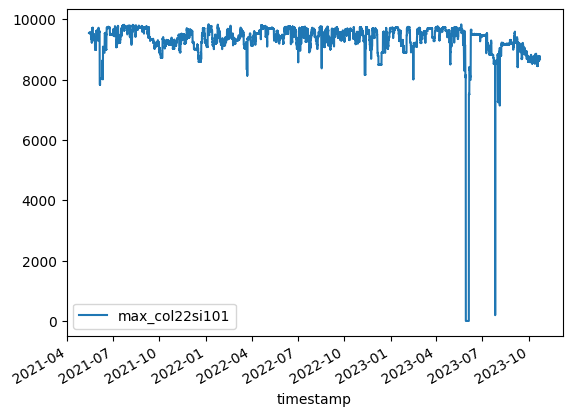

In [9]:
df[['max_col22si101']].plot()

In [53]:
sensors = list(set(col.split('_')[1] for col in df.columns if col.startswith('sum')))

# Calculate mean value per sensor
mean_values_per_sensor = {}
for sensor in sensors:
    sum_col = f'sum_{sensor}'
    count_col = f'count_{sensor}'
    mean_col = f'mean_{sensor}'

    if sum_col in df.columns and count_col in df.columns:
        mean_values_per_sensor[mean_col] = df[sum_col] / df[count_col]

mean_df = pd.DataFrame(mean_values_per_sensor)


In [ ]:
df =pd.concat([mean_df,df])
sensors = [s.replace('col','') for s in sensors]

In [59]:
mean_df.index ==df.index

array([ True,  True,  True, ...,  True,  True,  True])

In [57]:
pd.concat([mean_df,df], axis=0 )

,mean_col22vi06,mean_col22si101,mean_col22vi08,mean_col22vi01,mean_col22zi10,mean_col22pi70,mean_col22zi11,mean_col22pi69,mean_col22zi09,mean_col22vi04,...,sum_col22zi10,count_col22zi10,min_col22zi09,max_col22zi09,sum_col22zi09,count_col22zi09,min_col22zi11,max_col22zi11,sum_col22zi11,count_col22zi11
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-05-15 00:00:00,13.324762,9524.926489,14.325149,15.679021,0.156094,7.343062,0.302353,8.071341,0.345751,9.517116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-15 01:00:00,13.659278,9524.992980,14.517539,15.190919,0.151654,7.396549,0.298979,8.132896,0.340334,9.585590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-15 02:00:00,13.592266,9524.633450,14.594136,15.223742,0.156102,7.355522,0.303303,8.091354,0.344819,9.627821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-15 03:00:00,13.465790,9524.266054,14.460742,15.549620,0.155378,7.371939,0.301393,8.102917,0.343997,9.484477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-15 04:00:00,13.395362,9523.366705,14.489384,15.610735,0.155236,7.386381,0.301817,8.121092,0.344030,9.413911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-22 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.987416,360.0,0.397177,0.406333,145.110265,360.0,0.337657,0.346051,123.632962,360.0
2023-10-22 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.829463,360.0,0.397940,0.403281,144.260974,360.0,0.338420,0.343762,122.969867,360.0
2023-10-22 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.701269,360.0,0.396414,0.400992,143.442188,360.0,0.337657,0.341473,122.184671,360.0


In [71]:
def preprocess_sensor_data(df):
    sensors = list(set(col.split('_')[1] for col in df.columns if col.startswith('sum')))

    # Calculate mean value per sensor
    mean_values_per_sensor = {}
    for sensor in sensors:
        sum_col = f'sum_{sensor}'
        count_col = f'count_{sensor}'
        mean_col = f'mean_{sensor}'

        if sum_col in df.columns and count_col in df.columns:
            mean_values_per_sensor[mean_col] = df[sum_col] / df[count_col]

    mean_df = pd.DataFrame(mean_values_per_sensor)
    df =pd.concat([mean_df,df], axis=1)
    sensors = [s.replace('col','') for s in sensors]
    return df, sensors

In [72]:
x,y = preprocess_sensor_data(df)

In [73]:
x.columns

Index(['mean_col22vi06', 'mean_col22si101', 'mean_col22vi08', 'mean_col22vi01',
       'mean_col22zi10', 'mean_col22pi70', 'mean_col22zi11', 'mean_col22pi69',
       'mean_col22zi09', 'mean_col22vi04', 'timestamp', 'min_col22si101',
       'max_col22si101', 'sum_col22si101', 'count_col22si101', 'min_col22vi01',
       'max_col22vi01', 'sum_col22vi01', 'count_col22vi01', 'min_col22vi04',
       'max_col22vi04', 'sum_col22vi04', 'count_col22vi04', 'min_col22vi06',
       'max_col22vi06', 'sum_col22vi06', 'count_col22vi06', 'min_col22vi08',
       'max_col22vi08', 'sum_col22vi08', 'count_col22vi08', 'min_col22pi69',
       'max_col22pi69', 'sum_col22pi69', 'count_col22pi69', 'min_col22pi70',
       'max_col22pi70', 'sum_col22pi70', 'count_col22pi70', 'min_col22zi10',
       'max_col22zi10', 'sum_col22zi10', 'count_col22zi10', 'min_col22zi09',
       'max_col22zi09', 'sum_col22zi09', 'count_col22zi09', 'min_col22zi11',
       'max_col22zi11', 'sum_col22zi11', 'count_col22zi11'],
      dtyp

In [74]:
y

['22vi06',
 '22si101',
 '22vi08',
 '22vi01',
 '22zi10',
 '22pi70',
 '22zi11',
 '22pi69',
 '22zi09',
 '22vi04']

In [75]:
x

,mean_col22vi06,mean_col22si101,mean_col22vi08,mean_col22vi01,mean_col22zi10,mean_col22pi70,mean_col22zi11,mean_col22pi69,mean_col22zi09,mean_col22vi04,...,sum_col22zi10,count_col22zi10,min_col22zi09,max_col22zi09,sum_col22zi09,count_col22zi09,min_col22zi11,max_col22zi11,sum_col22zi11,count_col22zi11
0,13.324762,9524.926489,14.325149,15.679021,0.156094,7.343062,0.302353,8.071341,0.345751,9.517116,...,56.193680,360,0.339184,0.351393,124.470502,360,0.295798,0.307135,108.846996,360
1,13.659278,9524.992980,14.517539,15.190919,0.151654,7.396549,0.298979,8.132896,0.340334,9.585590,...,54.595351,360,0.333164,0.346051,122.520295,360,0.291873,0.304082,107.632321,360
2,13.592266,9524.633450,14.594136,15.223742,0.156102,7.355522,0.303303,8.091354,0.344819,9.627821,...,56.196610,360,0.338420,0.349103,124.134840,360,0.297300,0.307898,109.189251,360
3,13.465790,9524.266054,14.460742,15.549620,0.155378,7.371939,0.301393,8.102917,0.343997,9.484477,...,55.936170,360,0.336513,0.353623,123.838930,360,0.294735,0.310833,108.501444,360
4,13.395362,9523.366705,14.489384,15.610735,0.155236,7.386381,0.301817,8.121092,0.344030,9.413911,...,55.884917,360,0.339322,0.348548,123.850934,360,0.296590,0.306302,108.654027,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21378,15.500233,8698.068981,19.579253,11.283225,0.147187,8.859451,0.343425,9.719971,0.403084,9.871126,...,52.987416,360,0.397177,0.406333,145.110265,360,0.337657,0.346051,123.632962,360
21379,15.389800,8697.386475,19.466064,11.156047,0.146749,8.816720,0.341583,9.675849,0.400725,9.823435,...,52.829463,360,0.397940,0.403281,144.260974,360,0.338420,0.343762,122.969867,360
21380,15.385349,8697.520017,19.467548,11.065115,0.146392,8.804222,0.339402,9.661995,0.398451,9.722328,...,52.701269,360,0.396414,0.400992,143.442188,360,0.337657,0.341473,122.184671,360
21381,15.340413,8698.410238,19.395905,11.171309,0.146322,8.858332,0.341320,9.724075,0.400757,9.838908,...,52.676088,360,0.395651,0.404807,144.272416,360,0.337657,0.344525,122.875237,360
